# 1º Pate Ingeniería del dato


In [ ]:
#1 Carga de data set
import pandas as pd

# Cargar archivo Excel
archivo_excel = "/content/drive/MyDrive/Dataset TFG V2.xlsx"
xls = pd.ExcelFile(archivo_excel)

# Guardar cada hoja como CSV
for sheet_name in xls.sheet_names:
    df = xls.parse(sheet_name)
    df.to_csv(f"{sheet_name}.csv", index=False)

print("¡Vamos Pablooo!")


¡Vamos Pablooo!


In [ ]:
#2 División de data set y limpieza
import numpy as np

# Cargar los archivos CSV
df_2013 = pd.read_csv("/content/2013.csv")
df_2014 = pd.read_csv("/content/2014.csv")
df_2015 = pd.read_csv("/content/2015.csv")
df_2016 = pd.read_csv("/content/2016.csv")
df_2017 = pd.read_csv("/content/2017.csv")
df_2018 = pd.read_csv("/content/2018.csv")
df_2019 = pd.read_csv("/content/2019.csv")
df_2020 = pd.read_csv("/content/2020.csv")
df_2021 = pd.read_csv("/content/2021.csv")
df_2022 = pd.read_csv("/content/2022.csv")
df_2023 = pd.read_csv("/content/2023.csv")

# Lista de DataFrames
dataframes = [df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Reemplazar ":" por NaN en cada DataFrame
for i, df in enumerate(dataframes):
    dataframes[i] = df.applymap(lambda x: np.nan if x == ":" else x)



# Verificar que los DataFrames han sido correctamente asignados
print(dataframes[0].head())

       País Gasolina Híbrido no enchufable Gasolina  \
0   Austria  2003699                           9664   
1   Bélgica  1997354                          17954   
2  Bulgaria      NaN                            NaN   
3   Croacia      NaN                            NaN   
4    Chipre   422248                           1820   

  Híbrido enchufable Gasolina  Diésel  Híbrido no enchufable Diésel  \
0                         385  2621588                          432   
1                         NaN  3445309                         1194   
2                         NaN      NaN                          NaN   
3                         NaN   563000                          NaN   
4                           0    50478                            0   

  Híbrido enchufable Diésel Gas licuado de petróleo  Eléctrico Hidrógeno  \
0                        23                        1      2070         0   
1                       NaN                       17      1205         1   
2             

<ipython-input-3-ad0e12cbe2b6>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataframes[i] = df.applymap(lambda x: np.nan if x == ":" else x)


In [ ]:
3# Union de data set

years = list(range(2013, 2024))  # Años de 2013 a 2023

for i, df in enumerate(dataframes):
    df["Año"] = years[i]  # Añadir la columna Año con su respectivo valor

# Unir todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Verificar los primeros registros y los tipos de datos finales
print(df_final.head(350))
print(df_final.dtypes)



           País  Gasolina Híbrido no enchufable Gasolina  \
0       Austria   2003699                           9664   
1       Bélgica   1997354                          17954   
2      Bulgaria       NaN                            NaN   
3       Croacia       NaN                            NaN   
4        Chipre    422248                           1820   
..          ...       ...                            ...   
292     Rumanía   3711577                         157929   
293  Eslovaquia       NaN                            NaN   
294   Eslovenia    563481                          37278   
295      España  10876900                        1053410   
296      Suecia   2405382                         189996   

    Híbrido enchufable Gasolina   Diésel  Híbrido no enchufable Diésel  \
0                           385   2621588                          432   
1                           NaN   3445309                         1194   
2                           NaN       NaN                

In [ ]:
4# Interpolación
import pandas as pd
import numpy as np
from scipy import interpolate

# Crear DataFrame mensual
df_monthly = pd.DataFrame()

# Las columnas que vamos a interpolar
numeric_cols = ['Gasolina', 'Híbrido no enchufable Gasolina', 'Híbrido enchufable Gasolina',
                'Diésel ', 'Híbrido no enchufable Diésel', 'Híbrido enchufable Diésel',
                'Gas licuado de petróleo ', 'Eléctrico', 'Hidrógeno',
                'Precio luz  KMH', 'PIB per cápita',
                'Nº puntos de recarga eléctrica', 'Nº puntos de recarga hidrógeno ',
                'Nº puntos de recarga gas licuado']

# Para cada país
for pais in df_final['País'].unique():
    # Filtrar datos del país
    datos_pais = df_final[df_final['País'] == pais].copy()

    # Crear fechas mensuales
    fechas_mensuales = pd.date_range('2013-01-01', '2023-12-31', freq='M')
    df_temp = pd.DataFrame(index=fechas_mensuales)
    df_temp['País'] = pais
    df_temp['Año'] = df_temp.index.year
    df_temp['Mes'] = df_temp.index.month

    # Para cada columna numérica
    for columna in numeric_cols:
        # Convertir a números
        datos_pais[columna] = pd.to_numeric(datos_pais[columna], errors='coerce')

        # Encontrar primer y último año con datos
        datos_validos = datos_pais[~datos_pais[columna].isna()]

        if not datos_validos.empty:
            primer_año = datos_validos['Año'].min()
            ultimo_año = datos_validos['Año'].max()

            # Solo datos entre estos años
            datos_filtrados = datos_pais[(datos_pais['Año'] >= primer_año) &
                                       (datos_pais['Año'] <= ultimo_año)]

            # Interpolar si hay más de un dato
            if len(datos_filtrados) > 1:
                x = pd.to_datetime(datos_filtrados['Año'].astype(str) + '-12-31')
                y = datos_filtrados[columna].values

                # Crear función de interpolación
                f = interpolate.interp1d(x.astype(np.int64), y,
                                       kind='linear',
                                       bounds_error=False,
                                       fill_value=np.nan)

                # Interpolar solo entre años con datos
                mask_meses = (df_temp.index >= f"{primer_año}-01-01") & \
                            (df_temp.index <= f"{ultimo_año}-12-31")

                valores_interpolados = f(df_temp.index[mask_meses].astype(np.int64))
                # Eliminar negativos
                valores_interpolados = np.maximum(valores_interpolados, 0)

                df_temp.loc[mask_meses, columna] = valores_interpolados
            else:
                # Si solo hay un dato, usarlo solo para ese año
                año_unico = datos_validos['Año'].iloc[0]
                valor_unico = datos_validos[columna].iloc[0]
                df_temp.loc[df_temp['Año'] == año_unico, columna] = valor_unico
        else:
            df_temp[columna] = np.nan

    df_monthly = pd.concat([df_monthly, df_temp])



<ipython-input-5-cc02eb0078d7>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_mensuales = pd.date_range('2013-01-01', '2023-12-31', freq='M')
<ipython-input-5-cc02eb0078d7>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_mensuales = pd.date_range('2013-01-01', '2023-12-31', freq='M')
<ipython-input-5-cc02eb0078d7>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_mensuales = pd.date_range('2013-01-01', '2023-12-31', freq='M')
<ipython-input-5-cc02eb0078d7>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_mensuales = pd.date_range('2013-01-01', '2023-12-31', freq='M')
<ipython-input-5-cc02eb0078d7>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_mensuales = pd.date_range('20

In [ ]:
# 5 Verificación
#Verificar tipos de datos
print(df_monthly.dtypes)


País                                 object
Año                                   int32
Mes                                   int32
Gasolina                            float64
Híbrido no enchufable Gasolina      float64
Híbrido enchufable Gasolina         float64
Diésel                              float64
Híbrido no enchufable Diésel        float64
Híbrido enchufable Diésel           float64
Gas licuado de petróleo             float64
Eléctrico                           float64
Hidrógeno                           float64
Precio luz  KMH                     float64
PIB per cápita                      float64
Nº puntos de recarga eléctrica      float64
Nº puntos de recarga hidrógeno      float64
Nº puntos de recarga gas licuado    float64
dtype: object


In [ ]:
# 6 Como los tipos de datos son diferentes, los convertimos a lo que queremos y guardamos dataset interpolado

# Después de la interpolación y antes de guardar, convertir tipos de datos
columnas_a_entero = [col for col in df_monthly.columns if df_monthly[col].dtype == 'float64' and 'Precio luz' not in col]

# Convertir a entero las columnas seleccionadas
for columna in columnas_a_entero:
   df_monthly[columna] = df_monthly[columna].round().astype('Int64')  # Int64 permite NaN

# Verificar los tipos de datos
print("Tipos de datos después de la conversión:")
print(df_monthly.dtypes)

# Guardar el resultado
df_monthly.to_excel('dataset_mensual_interpolado.xlsx', index=False)

Tipos de datos después de la conversión:
País                                 object
Año                                   int32
Mes                                   int32
Gasolina                              Int64
Híbrido no enchufable Gasolina        Int64
Híbrido enchufable Gasolina           Int64
Diésel                                Int64
Híbrido no enchufable Diésel          Int64
Híbrido enchufable Diésel             Int64
Gas licuado de petróleo               Int64
Eléctrico                             Int64
Hidrógeno                             Int64
Precio luz  KMH                     float64
PIB per cápita                        Int64
Nº puntos de recarga eléctrica        Int64
Nº puntos de recarga hidrógeno        Int64
Nº puntos de recarga gas licuado      Int64
dtype: object


In [ ]:
# 7 Correlaciones (apartado de TFG)

# Filtrar solo diciembre de cada año
df_december = df_monthly[df_monthly['Mes'] == 12]

# Correlaciones
corr_pib = df_december['PIB per cápita'].corr(df_december['Eléctrico'])
corr_recarga = df_december['Nº puntos de recarga eléctrica'].corr(df_december['Eléctrico'])
corr_luz = df_december['Precio luz  KMH'].corr(df_december['Eléctrico'])
corr_hidrogeno = df_december['Nº puntos de recarga hidrógeno '].corr(df_december['Hidrógeno'])
corr_gas = df_december['Nº puntos de recarga gas licuado'].corr(df_december['Gas licuado de petróleo '])

print(f"Correlación entre PIB per cápita y Vehículos Eléctricos: {corr_pib:.3f}")
print(f"Correlación entre Puntos de Recarga y Vehículos Eléctricos: {corr_recarga:.3f}")
print(f"Correlación entre Precio Luz y Vehículos Eléctricos: {corr_luz:.3f}")
print(f"Correlación entre Puntos de Recarga H2 y Vehículos Hidrógeno: {corr_hidrogeno:.3f}")
print(f"Correlación entre Puntos de Recarga Gas y Vehículos Gas: {corr_gas:.3f}")


Correlación entre PIB per cápita y Vehículos Eléctricos: 0.152
Correlación entre Puntos de Recarga y Vehículos Eléctricos: 0.847
Correlación entre Precio Luz y Vehículos Eléctricos: 0.372
Correlación entre Puntos de Recarga H2 y Vehículos Hidrógeno: 0.935
Correlación entre Puntos de Recarga Gas y Vehículos Gas: 0.602


In [ ]:
#8 Estudio estadístico

# Filtrar datos de diciembre
df_december = df_monthly[df_monthly['Mes'] == 12]

# 1. Distribución del parque móvil por tipo (sumando todos los países)
tipos_vehiculos = ['Gasolina', 'Diésel ', 'Eléctrico', 'Hidrógeno',
                 'Gas licuado de petróleo ', 'Híbrido no enchufable Gasolina',
                 'Híbrido enchufable Gasolina', 'Híbrido no enchufable Diésel',
                 'Híbrido enchufable Diésel']

# Total por tipo de vehículo y año
total_por_tipo = df_december.groupby('Año')[tipos_vehiculos].sum()
print("Total de vehículos por tipo y año:")
print(total_por_tipo)

# 2. Tasa de crecimiento anual por tipo de vehículo
tasa_crecimiento = total_por_tipo.pct_change() * 100
print("\nTasa de crecimiento anual (%):")
print(tasa_crecimiento)

# 3. Tasa de crecimiento de puntos de recarga
tipos_puntos = ['Nº puntos de recarga eléctrica', 'Nº puntos de recarga hidrógeno ',
               'Nº puntos de recarga gas licuado']
total_puntos = df_december.groupby('Año')[tipos_puntos].sum()
tasa_puntos = total_puntos.pct_change() * 100
print("\nTasa de crecimiento anual de puntos de recarga (%):")
print(tasa_puntos)

# 4. Medidas de tendencia central
print("\nEstadísticas descriptivas generales:")
for tipo in tipos_vehiculos:
   print(f"\nEstadísticas para {tipo}:")
   print(df_december[tipo].describe())

Total de vehículos por tipo y año:
       Gasolina   Diésel   Eléctrico  Hidrógeno  Gas licuado de petróleo   \
Año                                                                         
2013   67795426  74210877      50275         39                   2857406   
2014   76912591  71752025      76232         61                   2947160   
2015   66433065  68391653     120009        222                   3016880   
2016   68636414  71210778     168165        322                   3068760   
2017  100676997  90375941     245951        659                   3144012   
2018  105913653  93734353     357134        742                   3328033   
2019  107976138  93922936     589967        979                   3485941   
2020  108248920  93504680    1092346       1498                   3688787   
2021  107837582  92310476    1937609       2129                   3797021   
2022  110968329  93169033    3009289       3186                   3947995   
2023  110824698  91602903    4363401     

# 2º Parte Análisis del dato


Analizando Eléctrico


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

Mejor orden MA para Eléctrico: MA(4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


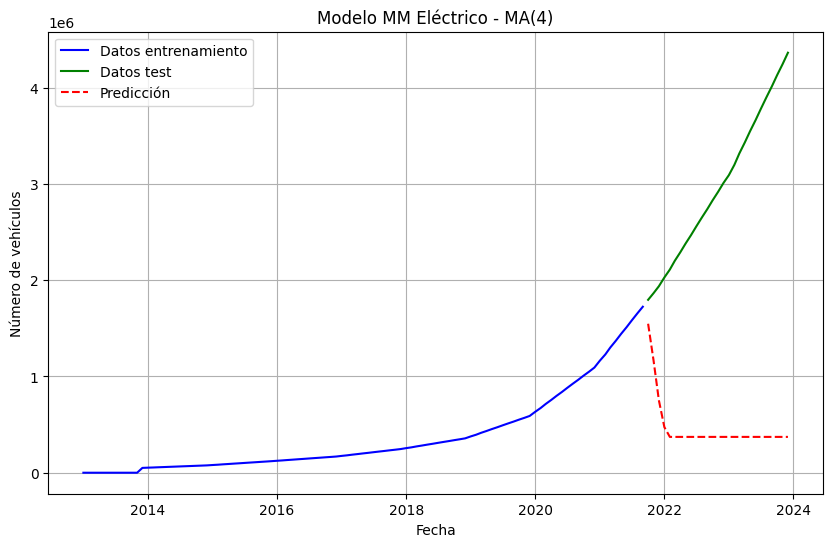

Analizando Diésel 


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Mejor orden MA para Diésel : MA(4)


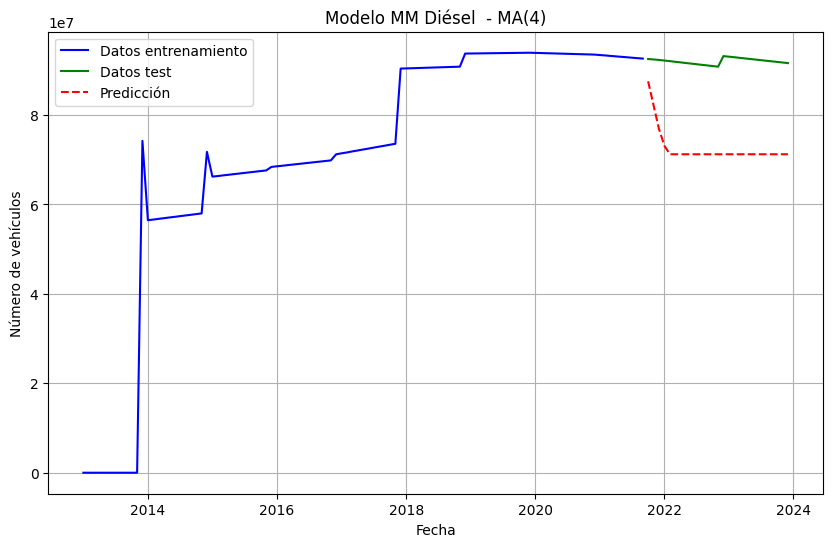

Analizando Gasolina


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Mejor orden MA para Gasolina: MA(5)


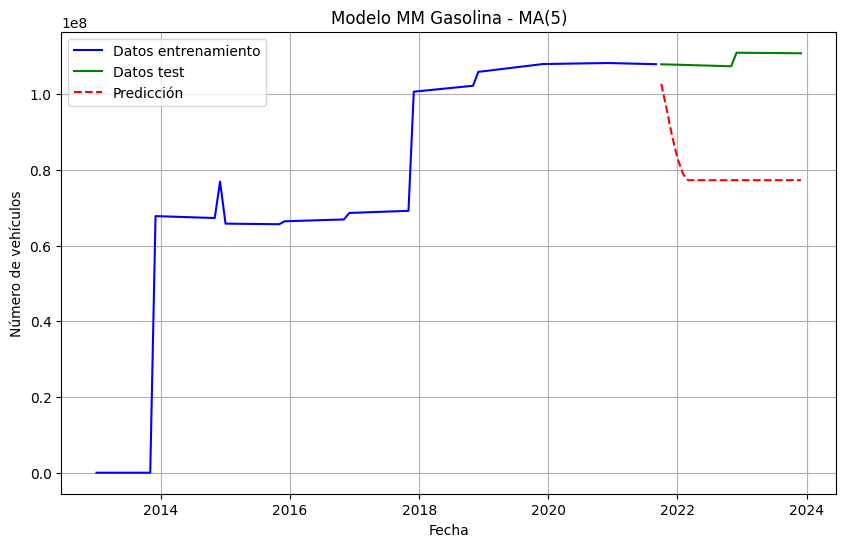

Analizando Hidrógeno


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

Mejor orden MA para Hidrógeno: MA(4)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


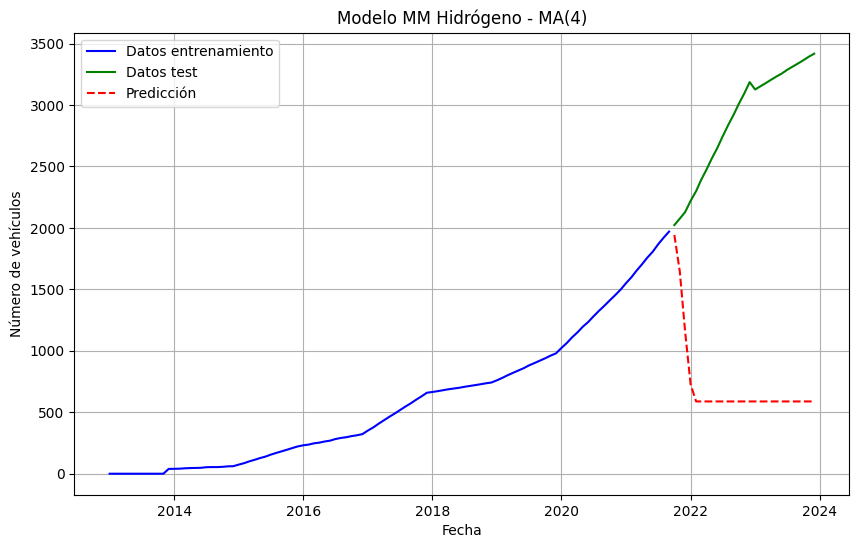

Analizando Gas licuado de petróleo 


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Mejor orden MA para Gas licuado de petróleo : MA(4)


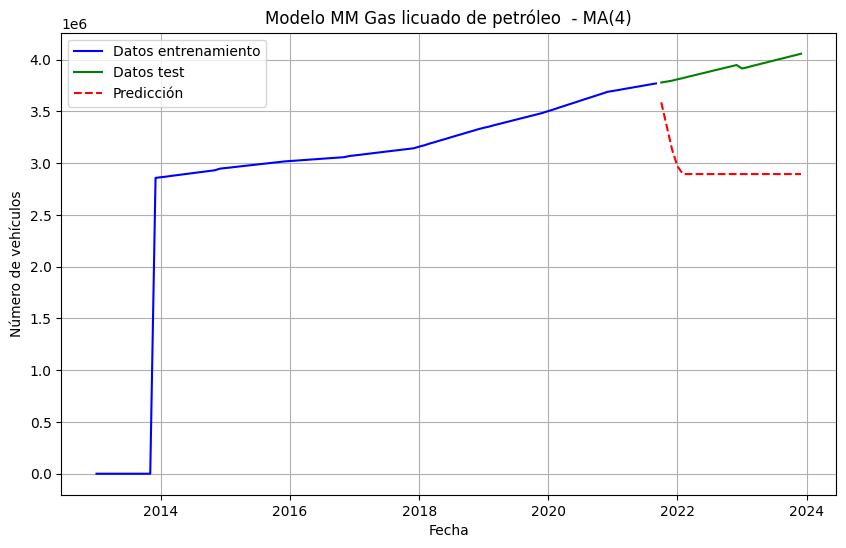

Analizando Híbrido enchufable Gasolina


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

Mejor orden MA para Híbrido enchufable Gasolina: MA(4)


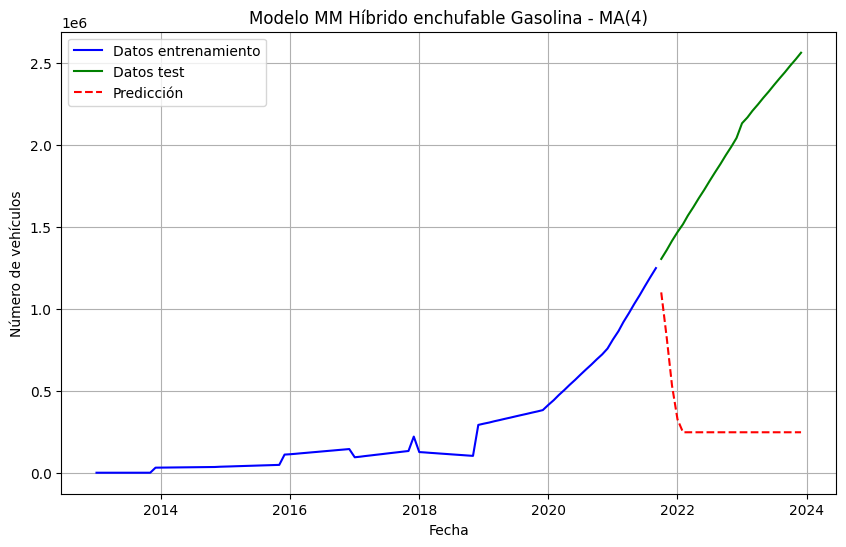


Resultados del modelo MM:
                 Tipo_Vehiculo Modelo          RMSE           MAE          AIC
0                    Eléctrico  MA(4)  2.684876e+06  2.517621e+06  2923.272185
1                      Diésel   MA(4)  1.985706e+07  1.951898e+07  3708.736436
2                     Gasolina  MA(5)  3.035982e+07  2.957795e+07  3694.501285
3                    Hidrógeno  MA(4)  2.291807e+03  2.180885e+03  1206.728083
4     Gas licuado de petróleo   MA(4)  9.901346e+05  9.668614e+05  3017.106258
5  Híbrido enchufable Gasolina  MA(4)  1.739674e+06  1.660334e+06  2863.525364


In [ ]:
# 9. Modelo MM

# Carga del dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

df = pd.read_excel('dataset_mensual_interpolado.xlsx')

# Creación de fecha combinando año y mes
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str).str.zfill(2) + '-01')

# Tipos de vehículos a analizar
tipos_vehiculos = ['Eléctrico', 'Diésel ', 'Gasolina', 'Hidrógeno',
                   'Gas licuado de petróleo ', 'Híbrido enchufable Gasolina']

# Suma de todos los países por fecha
df_totales = df.groupby('Fecha')[tipos_vehiculos].sum()

# Tabla para guardar los resultados
resultados = []

# Análisis de cada tipo de vehículo
for tipo in tipos_vehiculos:
    print(f"Analizando {tipo}")

    # Extracción de serie temporal
    serie = df_totales[tipo]

    # División en train y test
    train_size = int(len(serie) * 0.8)
    train = serie[:train_size]
    test = serie[train_size:]

    # Búsqueda del mejor orden MA (probando de 1 a 5)
    mejor_aic = float('inf')
    mejor_orden = 1

    for orden in range(1, 6):
        try:
            modelo_temp = ARIMA(train, order=(0, 0, orden))
            resultado_temp = modelo_temp.fit()

            if resultado_temp.aic < mejor_aic:
                mejor_aic = resultado_temp.aic
                mejor_orden = orden
        except:
            continue

    print(f"Mejor orden MA para {tipo}: MA({mejor_orden})")

    # Ajuste del modelo con el mejor orden
    modelo = ARIMA(train, order=(0, 0, mejor_orden))
    resultado_modelo = modelo.fit()

    # Predicciones
    predicciones = resultado_modelo.forecast(steps=len(test))

    # Cálculo del error
    rmse = np.sqrt(mean_squared_error(test, predicciones))
    mae = mean_absolute_error(test, predicciones)
    aic = resultado_modelo.aic
    r2 = r2_score(test, predicciones)

    # Guardado de resultados
    resultados.append({
        'Tipo_Vehiculo': tipo,
        'Modelo': f'MA({mejor_orden})',
        'RMSE': rmse,
        'MAE': mae,
        'AIC': aic
    })

    # Visualización
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, 'b-', label='Datos entrenamiento')
    plt.plot(test.index, test, 'g-', label='Datos test')
    plt.plot(test.index, predicciones, 'r--', label='Predicción')
    plt.title(f'Modelo MM {tipo} - MA({mejor_orden})')
    plt.xlabel('Fecha')
    plt.ylabel('Número de vehículos')
    plt.legend()
    plt.grid(True)
    plt.show()

# Conversión de resultados a dataframe
resultados_df = pd.DataFrame(resultados)
print("\nResultados del modelo MM:")
print(resultados_df)

# Guardado de resultados
resultados_df.to_excel('resultados_mm_mejor.xlsx', index=False)


Resultados para Total Eléctrico en la UE:


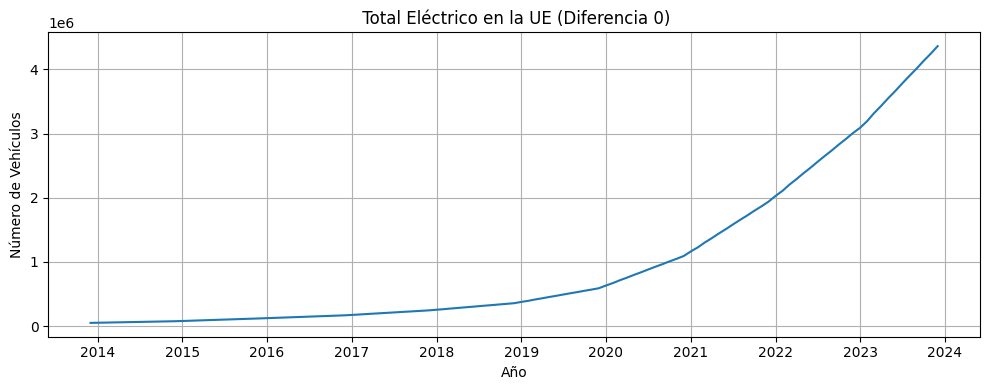


Nivel de diferencia: 0
Estadístico ADF: -1.047711383725403
p-valor: 0.735467591451396
Valores críticos:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223
Conclusión: La serie NO es estacionaria en el nivel de diferencia 0


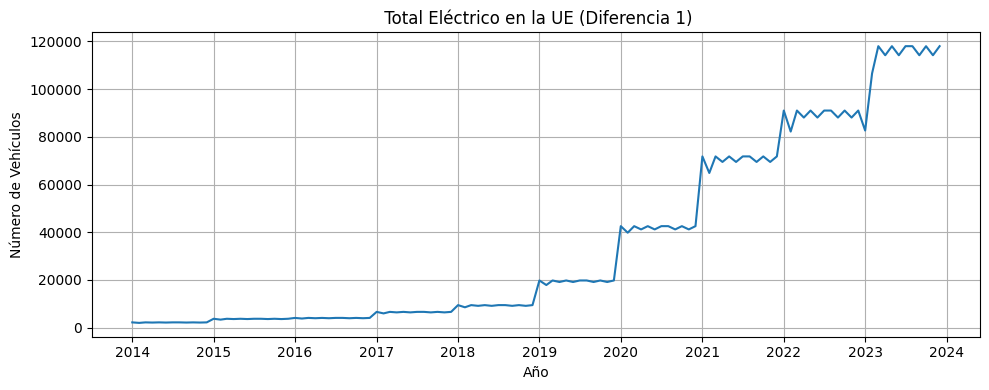


Nivel de diferencia: 1
Estadístico ADF: 1.53449077371056
p-valor: 0.9976471060781544
Valores críticos:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717
Conclusión: La serie NO es estacionaria en el nivel de diferencia 1


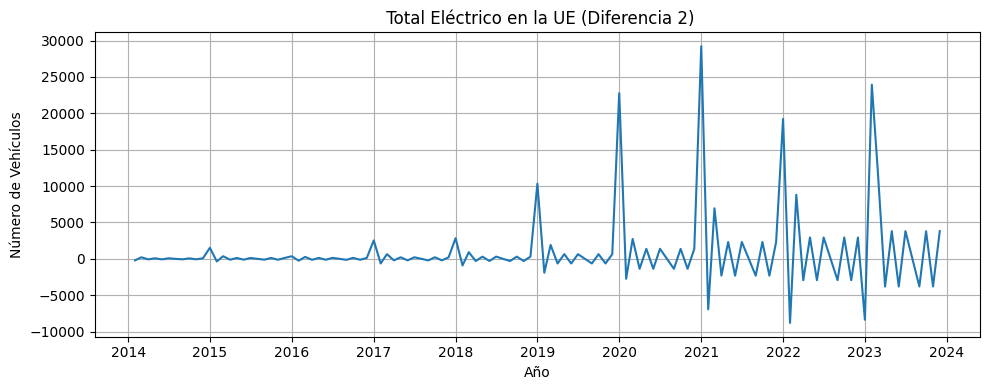


Nivel de diferencia: 2
Estadístico ADF: -0.8481287179435024
p-valor: 0.8045744000482129
Valores críticos:
   1%: -3.4942202045135513
   5%: -2.889485291005291
   10%: -2.5816762131519275
Conclusión: La serie NO es estacionaria en el nivel de diferencia 2


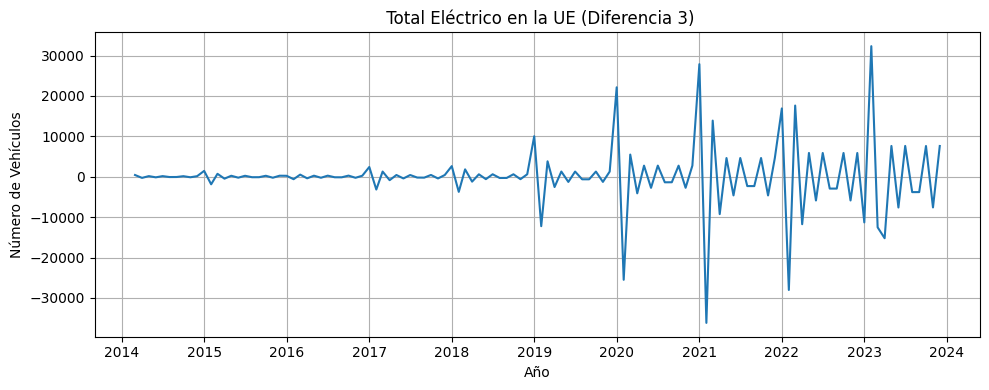


Nivel de diferencia: 3
Estadístico ADF: -9.297438595040628
p-valor: 1.136099010705205e-15
Valores críticos:
   1%: -3.4942202045135513
   5%: -2.889485291005291
   10%: -2.5816762131519275
Conclusión: La serie es estacionaria en el nivel de diferencia 3

Resultados para Total Diésel  en la UE:


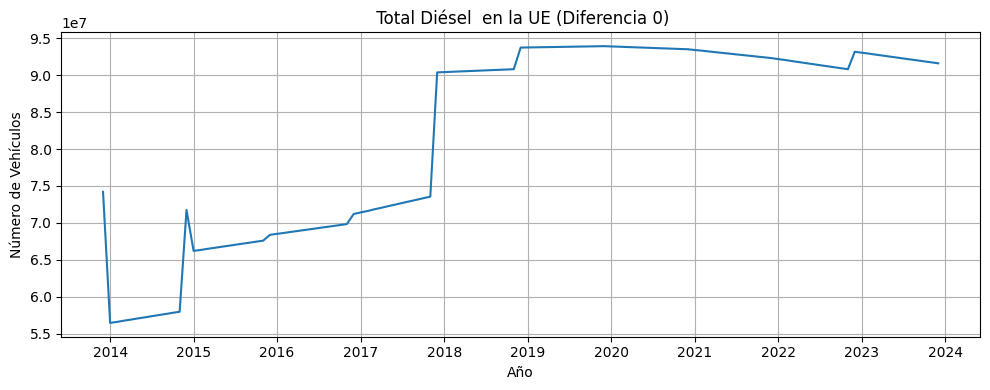


Nivel de diferencia: 0
Estadístico ADF: -1.0712808360940858
p-valor: 0.726387867146033
Valores críticos:
   1%: -3.486055829282407
   5%: -2.8859430324074076
   10%: -2.5797850694444446
Conclusión: La serie NO es estacionaria en el nivel de diferencia 0


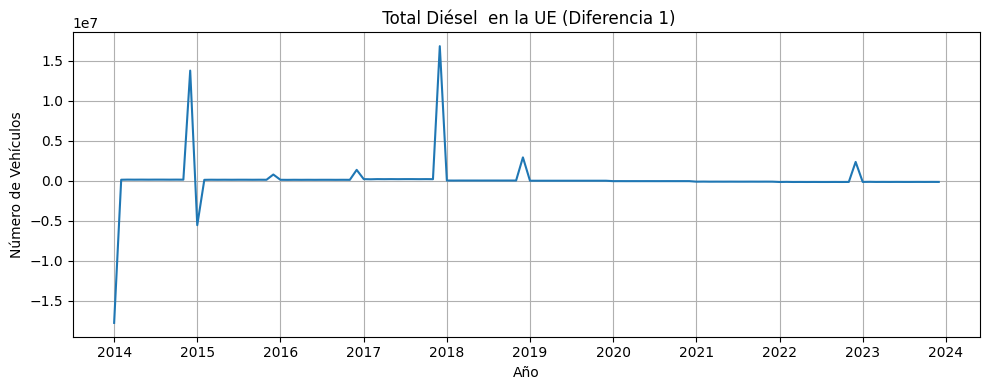


Nivel de diferencia: 1
Estadístico ADF: -15.18572110072166
p-valor: 6.108731793370871e-28
Valores críticos:
   1%: -3.4865346059036564
   5%: -2.8861509858476264
   10%: -2.579896092790057
Conclusión: La serie es estacionaria en el nivel de diferencia 1

Resultados para Total Gasolina en la UE:


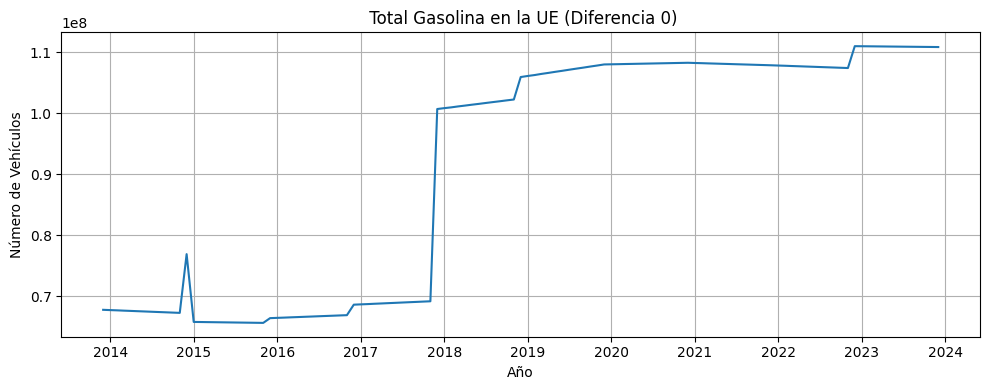


Nivel de diferencia: 0
Estadístico ADF: -1.0218169629287657
p-valor: 0.745224134896812
Valores críticos:
   1%: -3.486055829282407
   5%: -2.8859430324074076
   10%: -2.5797850694444446
Conclusión: La serie NO es estacionaria en el nivel de diferencia 0


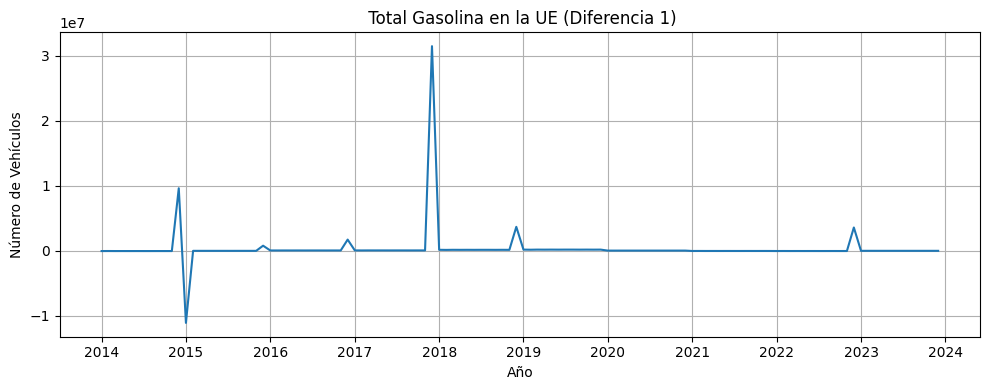


Nivel de diferencia: 1
Estadístico ADF: -11.884578383233524
p-valor: 6.065768270665561e-22
Valores críticos:
   1%: -3.4865346059036564
   5%: -2.8861509858476264
   10%: -2.579896092790057
Conclusión: La serie es estacionaria en el nivel de diferencia 1

Resultados para Total Hidrógeno en la UE:


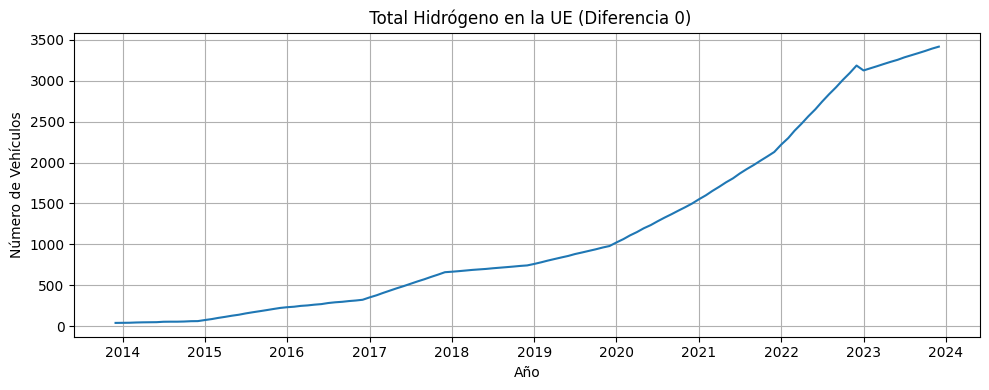


Nivel de diferencia: 0
Estadístico ADF: 1.1081423692338
p-valor: 0.9952855187635937
Valores críticos:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223
Conclusión: La serie NO es estacionaria en el nivel de diferencia 0


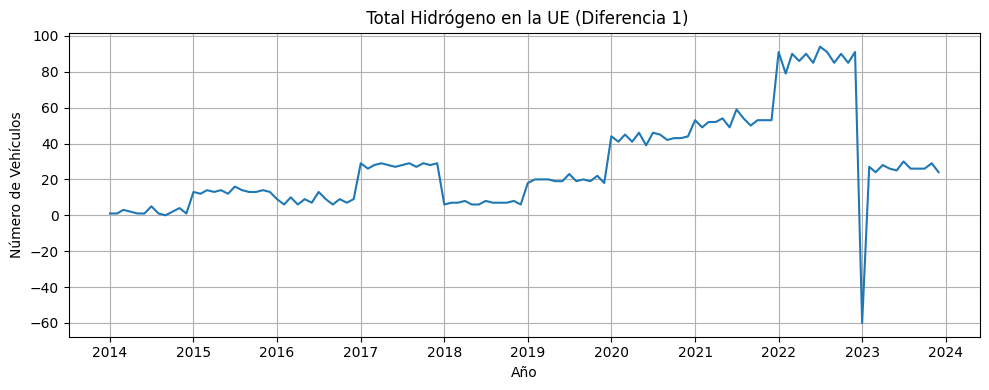


Nivel de diferencia: 1
Estadístico ADF: -0.7528926599980813
p-valor: 0.832569543988317
Valores críticos:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717
Conclusión: La serie NO es estacionaria en el nivel de diferencia 1


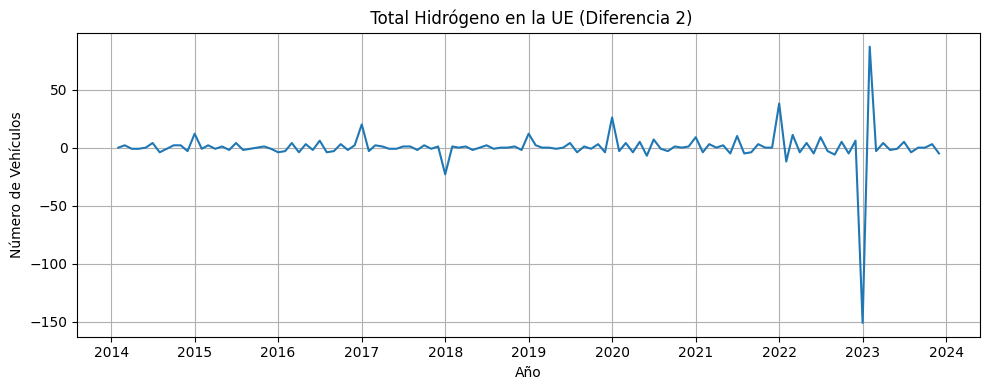


Nivel de diferencia: 2
Estadístico ADF: -5.702064298845726
p-valor: 7.635569139396457e-07
Valores críticos:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717
Conclusión: La serie es estacionaria en el nivel de diferencia 2

Resultados para Total Gas licuado de petróleo  en la UE:


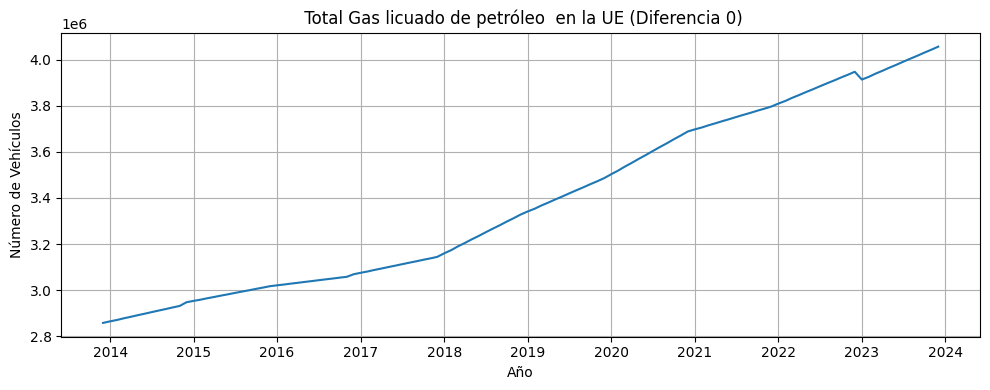


Nivel de diferencia: 0
Estadístico ADF: 1.3323370337627078
p-valor: 0.9967839957430501
Valores críticos:
   1%: -3.487517288664615
   5%: -2.8865777180380032
   10%: -2.5801239192052012
Conclusión: La serie NO es estacionaria en el nivel de diferencia 0


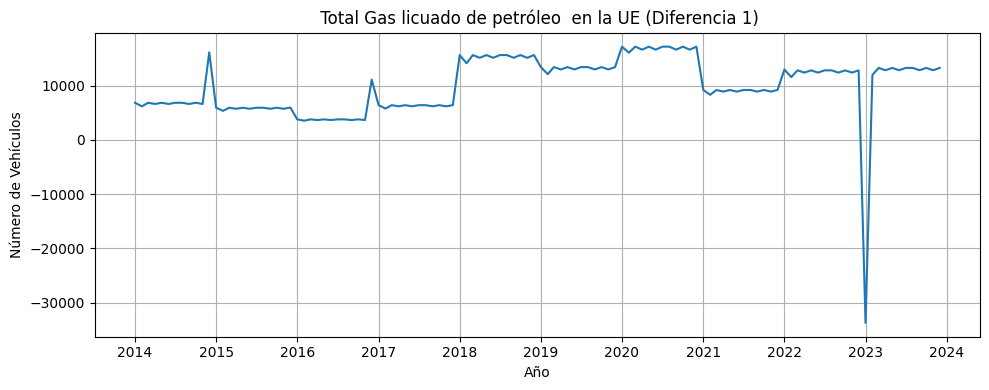


Nivel de diferencia: 1
Estadístico ADF: -3.396384623964745
p-valor: 0.011082738699317128
Valores críticos:
   1%: -3.487517288664615
   5%: -2.8865777180380032
   10%: -2.5801239192052012
Conclusión: La serie es estacionaria en el nivel de diferencia 1

Resultados para Total Híbrido enchufable Gasolina en la UE:


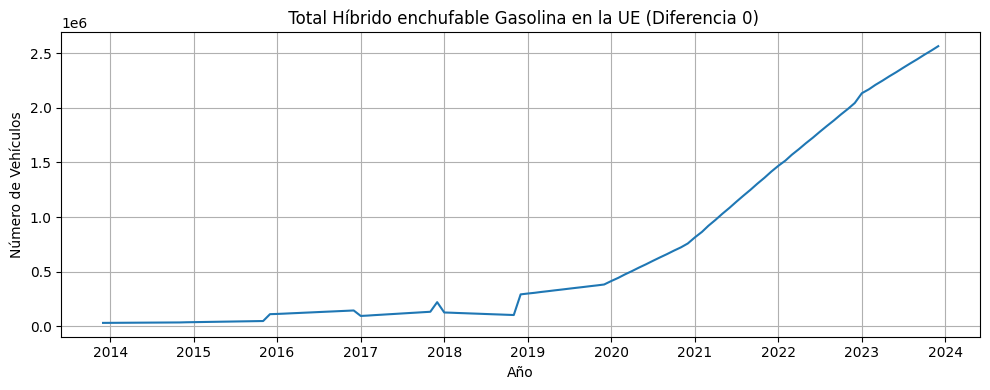


Nivel de diferencia: 0
Estadístico ADF: 0.22395078617588451
p-valor: 0.9735733770250011
Valores críticos:
   1%: -3.4924012594942333
   5%: -2.8886968193364835
   10%: -2.5812552709190673
Conclusión: La serie NO es estacionaria en el nivel de diferencia 0


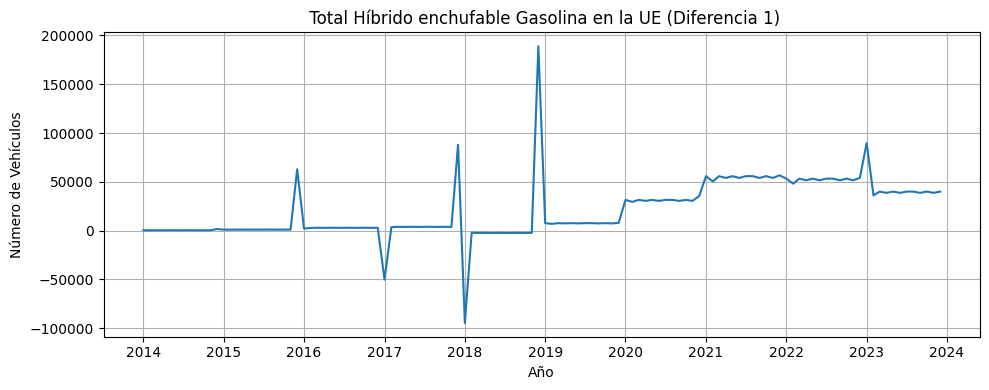


Nivel de diferencia: 1
Estadístico ADF: -0.9348969659772303
p-valor: 0.7762632793769886
Valores críticos:
   1%: -3.4924012594942333
   5%: -2.8886968193364835
   10%: -2.5812552709190673
Conclusión: La serie NO es estacionaria en el nivel de diferencia 1


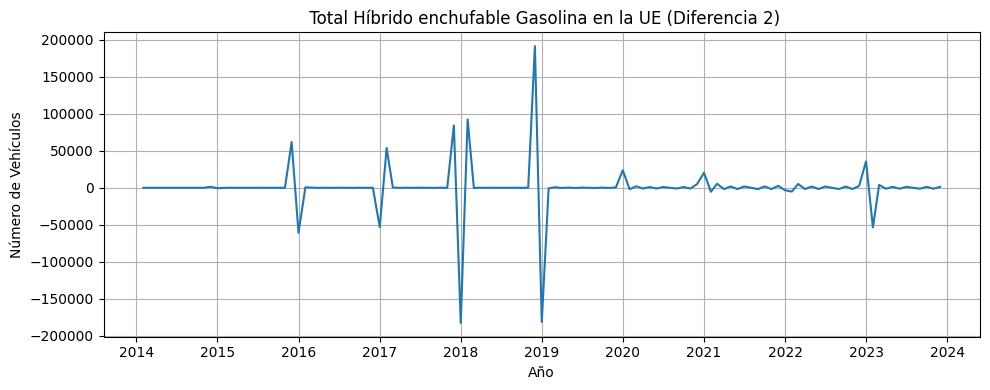


Nivel de diferencia: 2
Estadístico ADF: -5.2760669814109535
p-valor: 6.136582021329441e-06
Valores críticos:
   1%: -3.4924012594942333
   5%: -2.8886968193364835
   10%: -2.5812552709190673
Conclusión: La serie es estacionaria en el nivel de diferencia 2

Resumen de órdenes de diferenciación necesarios para series temporales de la UE:
Eléctrico: Requiere diferenciación de orden 3
Diésel : Requiere diferenciación de orden 1
Gasolina: Requiere diferenciación de orden 1
Hidrógeno: Requiere diferenciación de orden 2
Gas licuado de petróleo : Requiere diferenciación de orden 1
Híbrido enchufable Gasolina: Requiere diferenciación de orden 2


In [ ]:
10# Prueba de Dickey-Fuller para verificar estacionariedad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Cargar dataset
df = pd.read_excel('dataset_mensual_interpolado.xlsx')

# Convertir año y mes a una columna de fecha
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str).str.zfill(2) + '-01')

# Filtrar para incluir solo datos a partir de diciembre 2013
fecha_inicio = pd.to_datetime('2013-12-01')
df_filtrado = df[df['Fecha'] >= fecha_inicio].copy()

# Tipos de vehículos a analizar
tipos_vehiculos = ['Eléctrico', 'Diésel ', 'Gasolina', 'Hidrógeno',
                 'Gas licuado de petróleo ', 'Híbrido enchufable Gasolina']

# Función para realizar test de Dickey-Fuller
def test_estacionariedad(serie, nombre_serie):
    print(f"\nResultados para {nombre_serie}:")

    # Función interna para aplicar diferencias
    def aplicar_diferencia(serie_actual, nivel=0):
        # Gráfica de la serie temporal
        plt.figure(figsize=(10, 4))
        plt.plot(serie_actual)
        plt.title(f' {nombre_serie} (Diferencia {nivel})')
        plt.xlabel('Año')
        plt.ylabel('Número de Vehículos')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Test de Dickey-Fuller
        resultado = adfuller(serie_actual.dropna())

        print(f'\nNivel de diferencia: {nivel}')
        print('Estadístico ADF:', resultado[0])
        print('p-valor:', resultado[1])
        print('Valores críticos:')
        for key, value in resultado[4].items():
            print(f'   {key}: {value}')

        # Interpretar resultado. Rechazamos Hipotesis nula si p < 0.05
        if resultado[1] <= 0.05:
            print(f"Conclusión: La serie es estacionaria en el nivel de diferencia {nivel}")
            return nivel
        else:
            print(f"Conclusión: La serie NO es estacionaria en el nivel de diferencia {nivel}")

            # Aplicar siguiente nivel de diferencia
            try:
                serie_diff = serie_actual.diff().dropna()
                return aplicar_diferencia(serie_diff, nivel + 1)
            except Exception as e:
                print(f"Error al aplicar diferencia: {e}")
                return nivel

    # Iniciar proceso de diferenciación
    return aplicar_diferencia(serie)

# Crear un diccionario para almacenar el orden de diferenciación necesario
ordenes_diferenciacion = {}

# Agrupar por fecha y sumar los vehículos de todos los países para cada tipo
df_eu_totales = df_filtrado.groupby(['Año', 'Mes', 'Fecha'])[tipos_vehiculos].sum().reset_index()
df_eu_totales.set_index('Fecha', inplace=True)

# Analizar cada tipo de vehículo para el total de la UE
for tipo in tipos_vehiculos:
    serie = df_eu_totales[tipo]
    serie = serie.astype(float)

    orden = test_estacionariedad(serie, f"Total {tipo} en la UE")
    ordenes_diferenciacion[tipo] = orden

print("\nResumen de órdenes de diferenciación necesarios para series temporales de la UE:")
for tipo, orden in ordenes_diferenciacion.items():
    print(f"{tipo}: Requiere diferenciación de orden {orden}")

# Guardar los resultados para usar en el modelo MM
import pickle
with open('ordenes_diferenciacion_UE_total.pkl', 'wb') as f:
    pickle.dump(ordenes_diferenciacion, f)

# Guardar también el dataframe con los totales de la UE para usarlo en el siguiente script
df_eu_totales.to_excel('totales_UE_mensuales.xlsx')


Analizando Eléctrico
Buscando mejores parámetros para Eléctrico con d=3...
Mejor modelo: ARIMA(1,3,1)


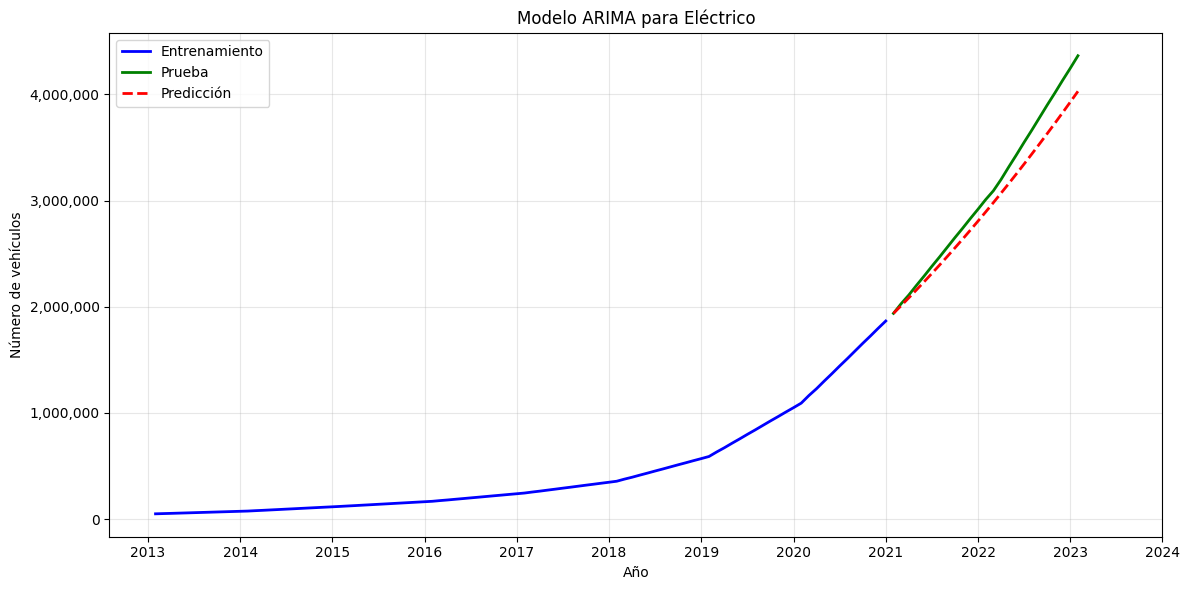


Analizando Diésel 
Buscando mejores parámetros para Diésel  con d=1...
Mejor modelo: ARIMA(0,1,1)


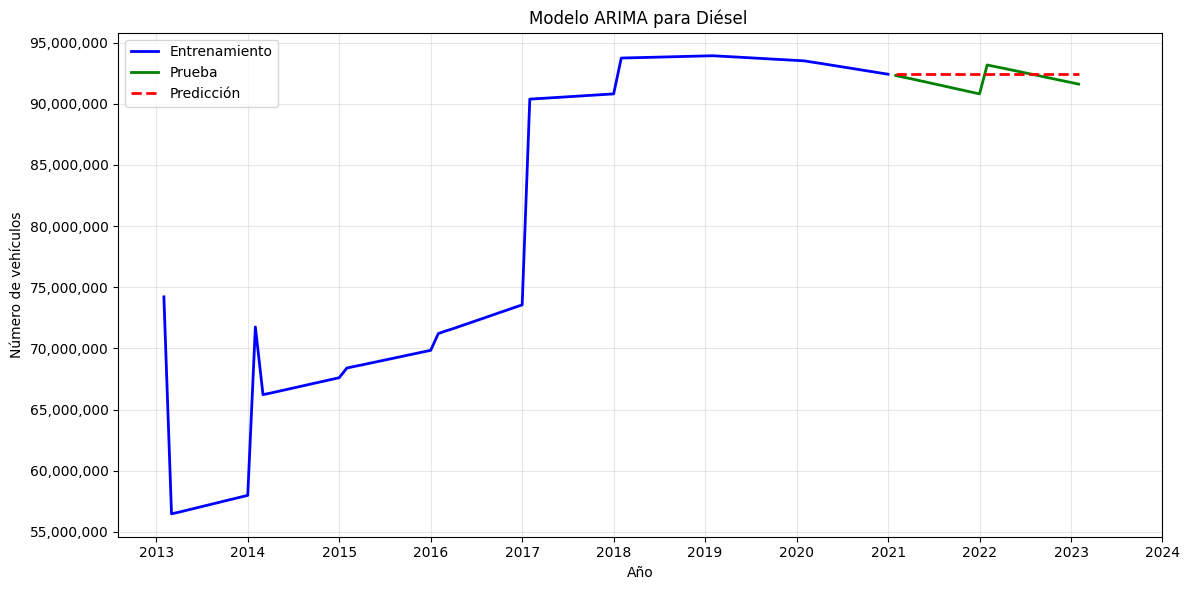


Analizando Gasolina
Buscando mejores parámetros para Gasolina con d=1...
Mejor modelo: ARIMA(1,1,0)


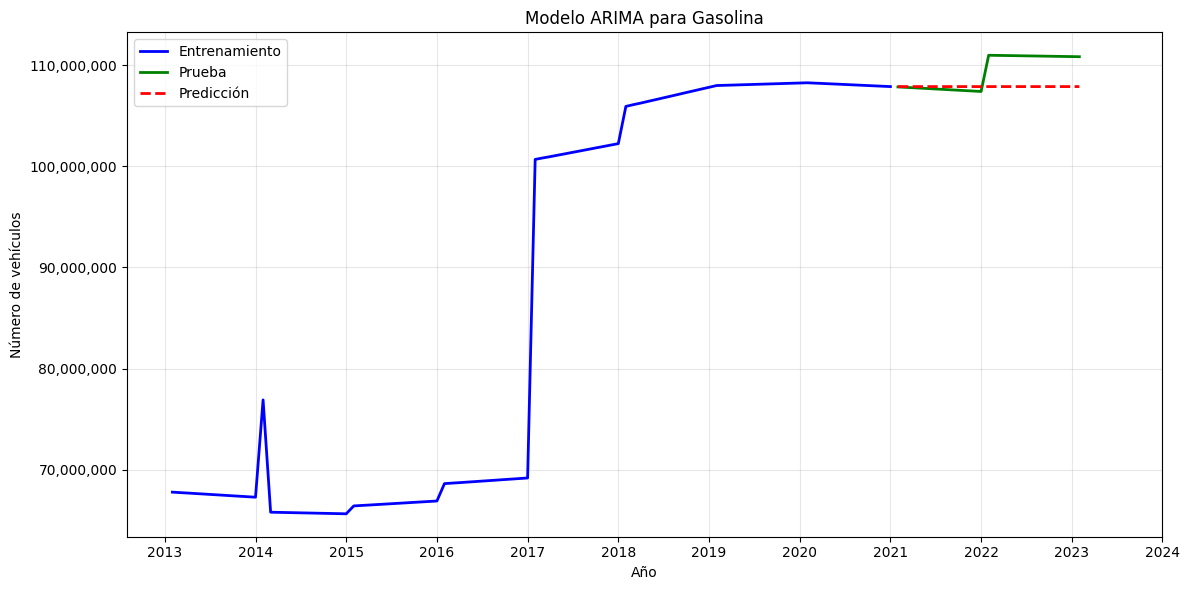


Analizando Hidrógeno
Buscando mejores parámetros para Hidrógeno con d=2...
Mejor modelo: ARIMA(4,2,2)


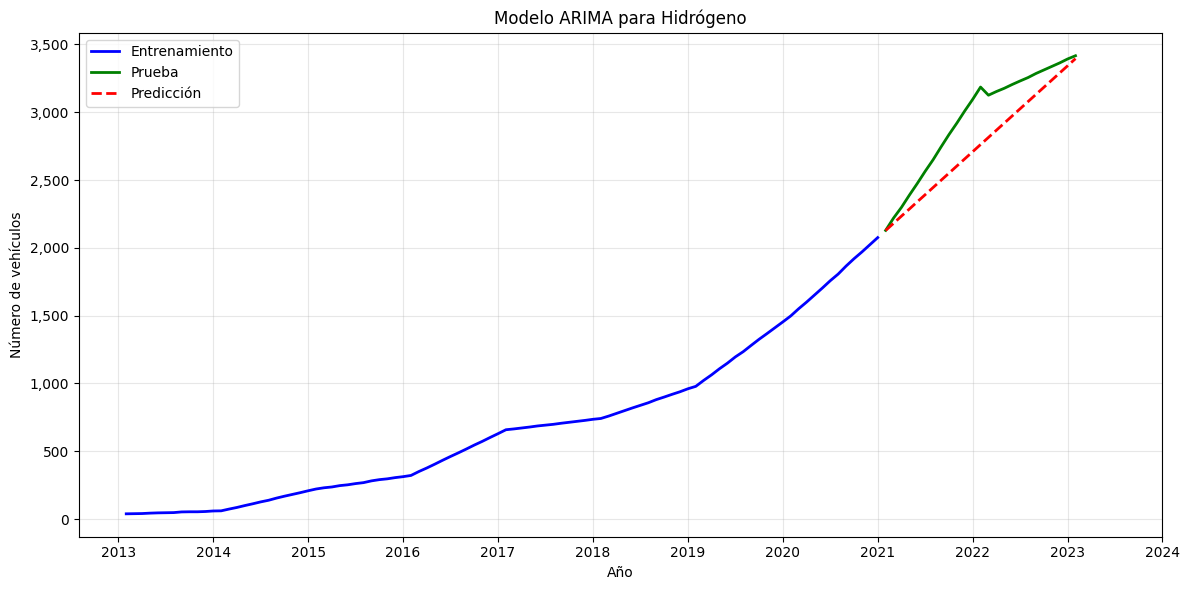


Analizando Gas licuado de petróleo 
Buscando mejores parámetros para Gas licuado de petróleo  con d=2...
Mejor modelo: ARIMA(0,2,1)


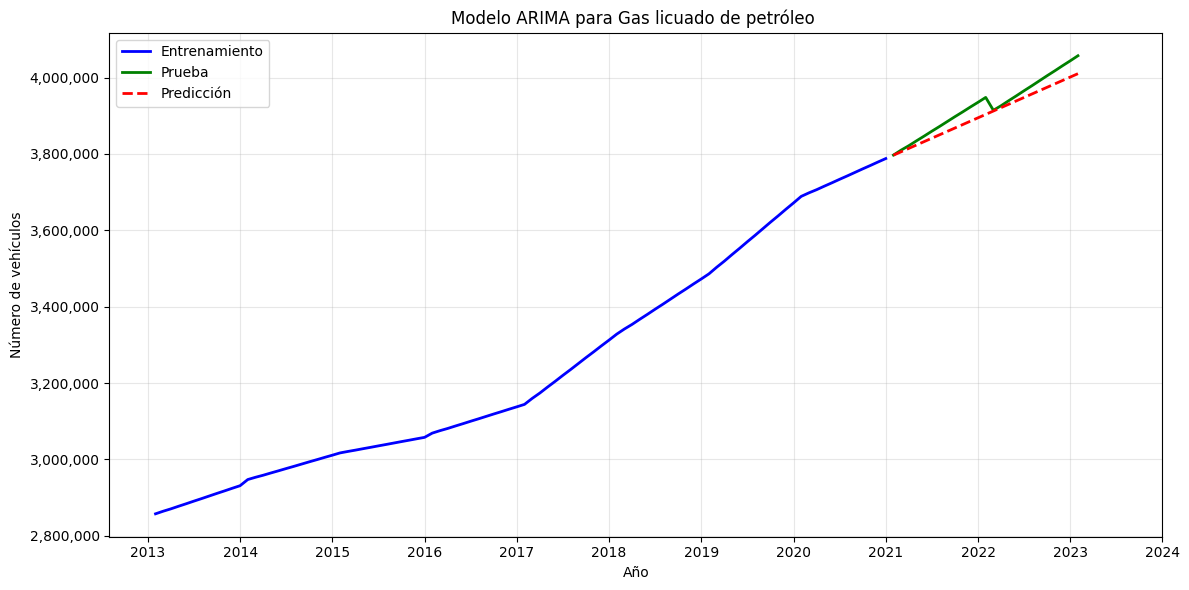


Analizando Híbrido enchufable Gasolina
Buscando mejores parámetros para Híbrido enchufable Gasolina con d=2...
Mejor modelo: ARIMA(0,2,1)


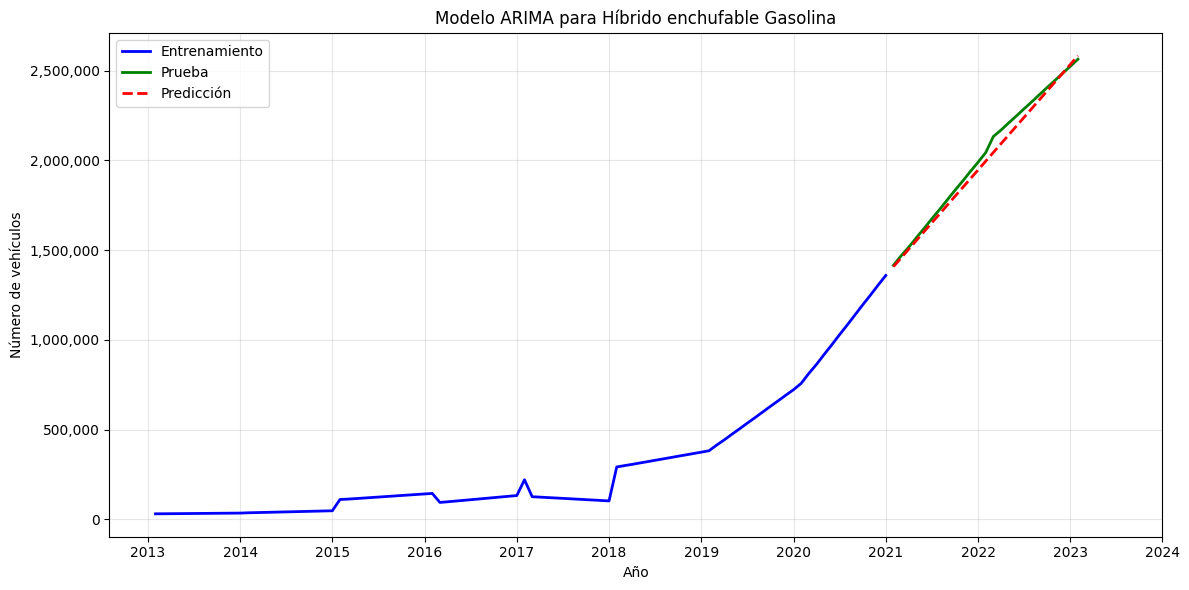


Resultados del modelo ARIMA:
                 Tipo_Vehiculo        Modelo          RMSE           MAE  \
0                    Eléctrico  ARIMA(1,3,1)  1.767068e+05  1.469280e+05   
1                      Diésel   ARIMA(0,1,1)  7.792781e+05  6.454135e+05   
2                     Gasolina  ARIMA(1,1,0)  2.190199e+06  1.696578e+06   
3                    Hidrógeno  ARIMA(4,2,2)  2.219369e+02  1.890153e+02   
4     Gas licuado de petróleo   ARIMA(0,2,1)  2.700403e+04  2.303687e+04   
5  Híbrido enchufable Gasolina  ARIMA(0,2,1)  3.881660e+04  3.198575e+04   

           AIC  
0  1817.340998  
1  3059.007518  
2  3141.283295  
3   577.561981  
4  1720.401151  
5  2190.190444  


In [ ]:
# 11. Modelo ARIMA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Carga de datos
df = pd.read_excel('totales_UE_mensuales.xlsx')

# Tipos de vehículos a analizar
tipos_vehiculos = ['Eléctrico', 'Diésel ', 'Gasolina', 'Hidrógeno',
                   'Gas licuado de petróleo ', 'Híbrido enchufable Gasolina']

# Órdenes de diferenciación según test de Dickey-Fuller
ordenes_diferenciacion = {
    'Eléctrico': 3,
    'Diésel ': 1,
    'Gasolina': 1,
    'Hidrógeno': 2,
    'Gas licuado de petróleo ': 2,
    'Híbrido enchufable Gasolina': 2
}

def find_best_arima(train_data, d, p_max=5, q_max=5):
    """
    Busca los mejores parámetros p, q para un modelo ARIMA con d fijo
    utilizando AIC como criterio
    """
    best_aic = float('inf')
    best_p, best_q = 0, 0

    for p in range(0, p_max + 1):
        for q in range(0, q_max + 1):
            # Evitar modelo trivial
            if p == 0 and q == 0:
                continue

            try:
                modelo = ARIMA(train_data, order=(p, d, q))
                resultado = modelo.fit()

                if resultado.aic < best_aic:
                    best_aic = resultado.aic
                    best_p = p
                    best_q = q

            except:
                continue

    return best_p, best_q

# Tabla para guardar resultados
resultados = []

# Análisis de cada tipo de vehículo
for tipo in tipos_vehiculos:
    print(f"\nAnalizando {tipo}")

    # Extracción de serie temporal
    serie = df[tipo].astype(float)

    # División en train (80%) y test (20%)
    train_size = int(len(serie) * 0.8)
    train = serie[:train_size]
    test = serie[train_size:]

    # Obtener orden de diferenciación fijo
    d = ordenes_diferenciacion[tipo]

    # Buscar mejores parámetros p y q
    print(f"Buscando mejores parámetros para {tipo} con d={d}...")
    best_p, best_q = find_best_arima(train, d)
    print(f"Mejor modelo: ARIMA({best_p},{d},{best_q})")

    try:
        # Ajuste del mejor modelo
        modelo = ARIMA(train, order=(best_p, d, best_q))
        resultado_modelo = modelo.fit()

        # Predicciones
        predicciones = resultado_modelo.forecast(steps=len(test))

        # Cálculo de métricas
        rmse = np.sqrt(mean_squared_error(test, predicciones))
        mae = mean_absolute_error(test, predicciones)
        aic = resultado_modelo.aic

        # Guardado de resultados
        resultados.append({
            'Tipo_Vehiculo': tipo,
            'Modelo': f'ARIMA({best_p},{d},{best_q})',
            'RMSE': rmse,
            'MAE': mae,
            'AIC': aic
        })

        # Crear eje temporal con años
        # Asumiendo que los datos empiezan en 2013 (enero)
        inicio_año = 2013
        meses_totales = len(serie)

        # Crear array de fechas
        fechas = []
        for i in range(meses_totales):
            año = inicio_año + i // 12
            mes = (i % 12) + 1
            fechas.append(año + mes/12)

        # Separar fechas para train y test
        fechas_train = fechas[:train_size]
        fechas_test = fechas[train_size:]

        # Visualización
        plt.figure(figsize=(12, 6))
        plt.plot(fechas_train, train, 'b-', label='Entrenamiento', linewidth=2)
        plt.plot(fechas_test, test, 'g-', label='Prueba', linewidth=2)
        plt.plot(fechas_test, predicciones, 'r--', label='Predicción', linewidth=2)
        plt.title(f'Modelo ARIMA para {tipo}')
        plt.xlabel('Año')
        plt.ylabel('Número de vehículos')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Formatear eje Y para mostrar números enteros
        ax = plt.gca()
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

        # Ajustar etiquetas del eje X para mostrar solo años enteros
        años_unicos = list(range(inicio_año, inicio_año + meses_totales//12 + 2))
        plt.xticks(años_unicos)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al procesar {tipo}: {e}")

# Conversión de resultados a dataframe
resultados_df = pd.DataFrame(resultados)
print("\nResultados del modelo ARIMA:")
print(resultados_df)

# Guardado de resultados
resultados_df.to_excel('resultados_arima.xlsx', index=False)

Analizando Eléctrico


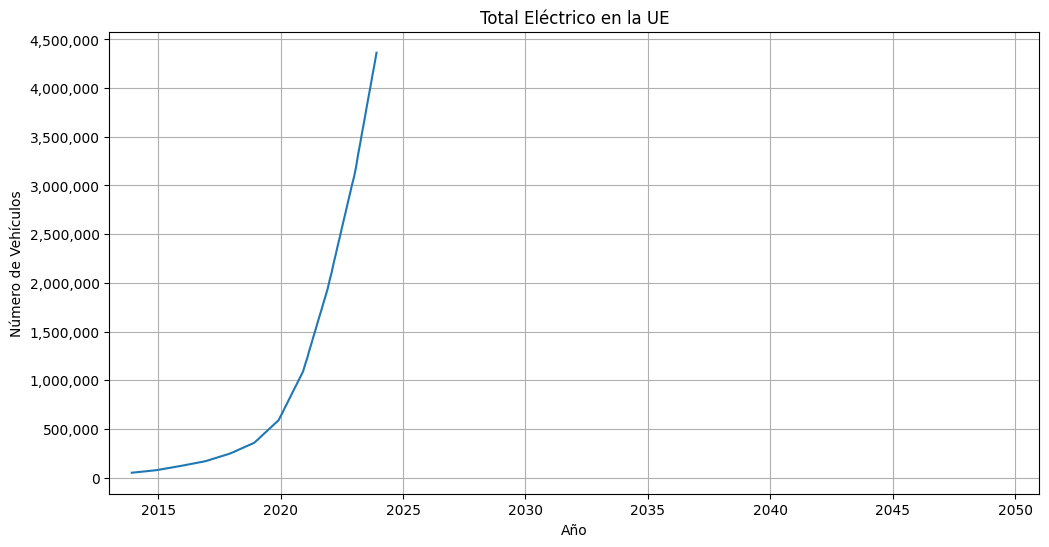

Predicción para 2035: 34,883,786 vehículos
Predicción para 2050: 116,791,329 vehículos


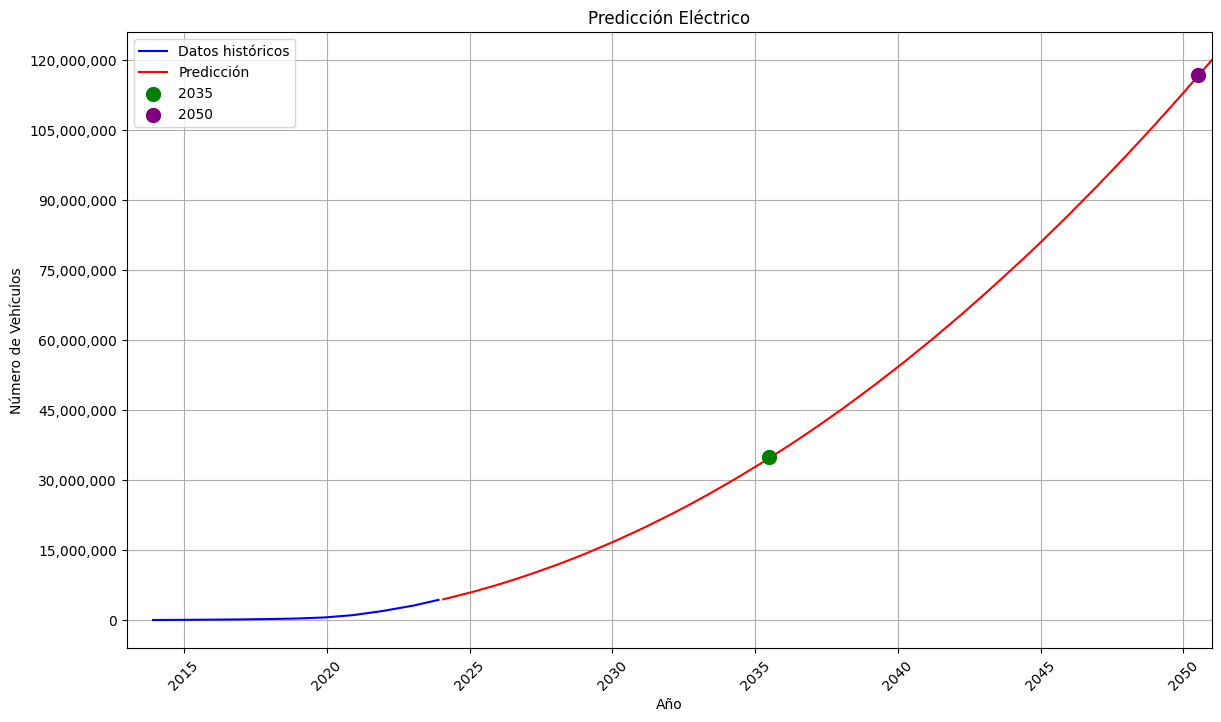

Analizando Diésel 


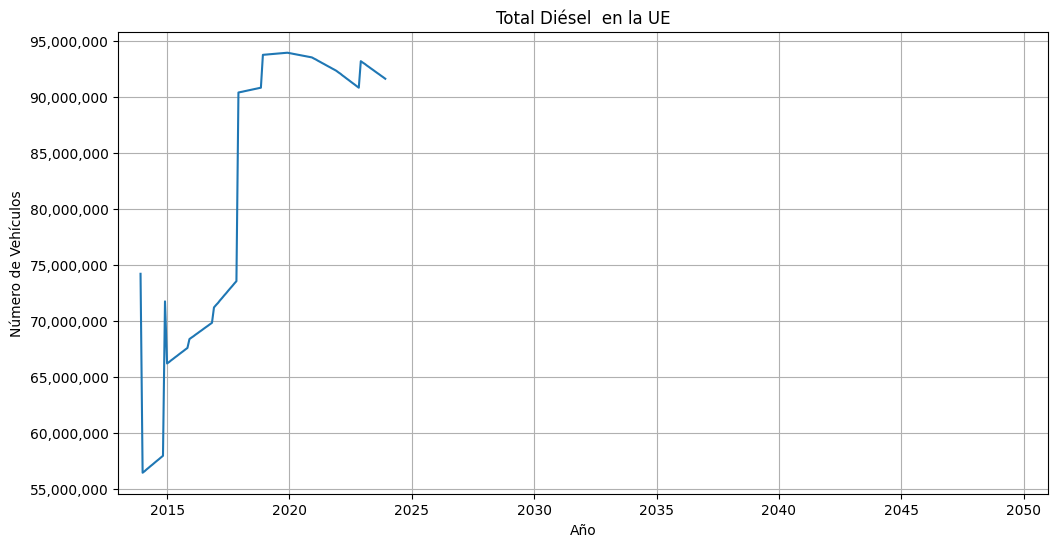

Predicción para 2035: 86,956,596 vehículos
Predicción para 2050: 34,782,638 vehículos


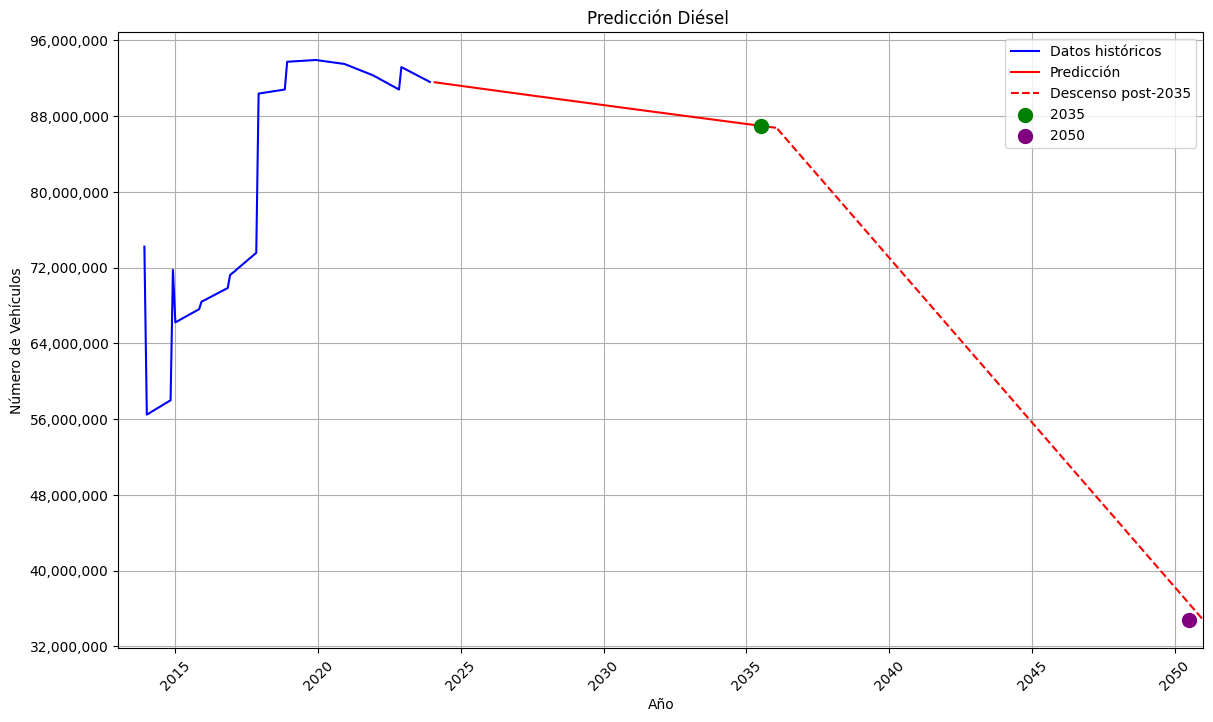

Analizando Gasolina


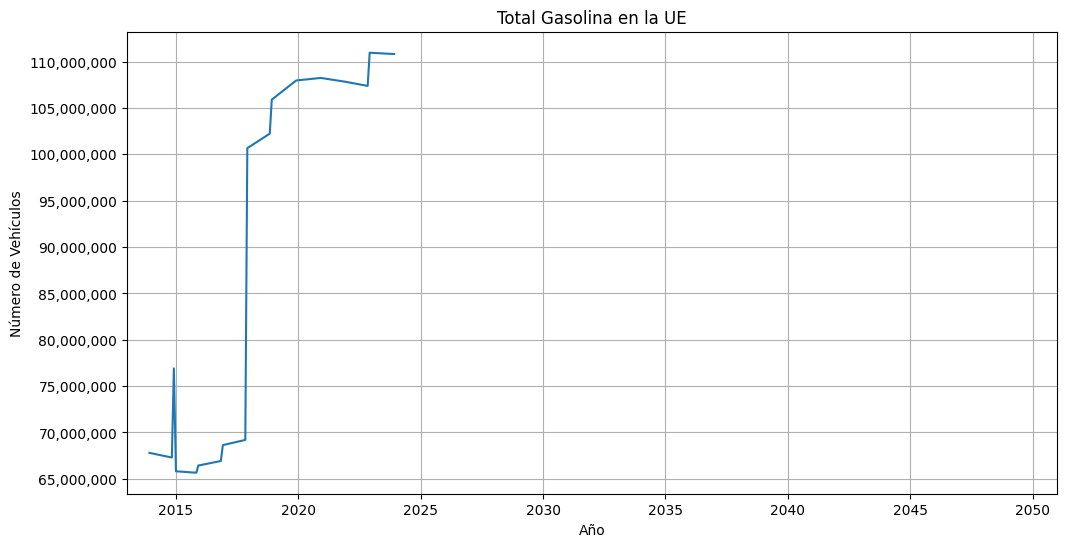

Predicción para 2035: 123,180,529 vehículos
Predicción para 2050: 49,272,211 vehículos


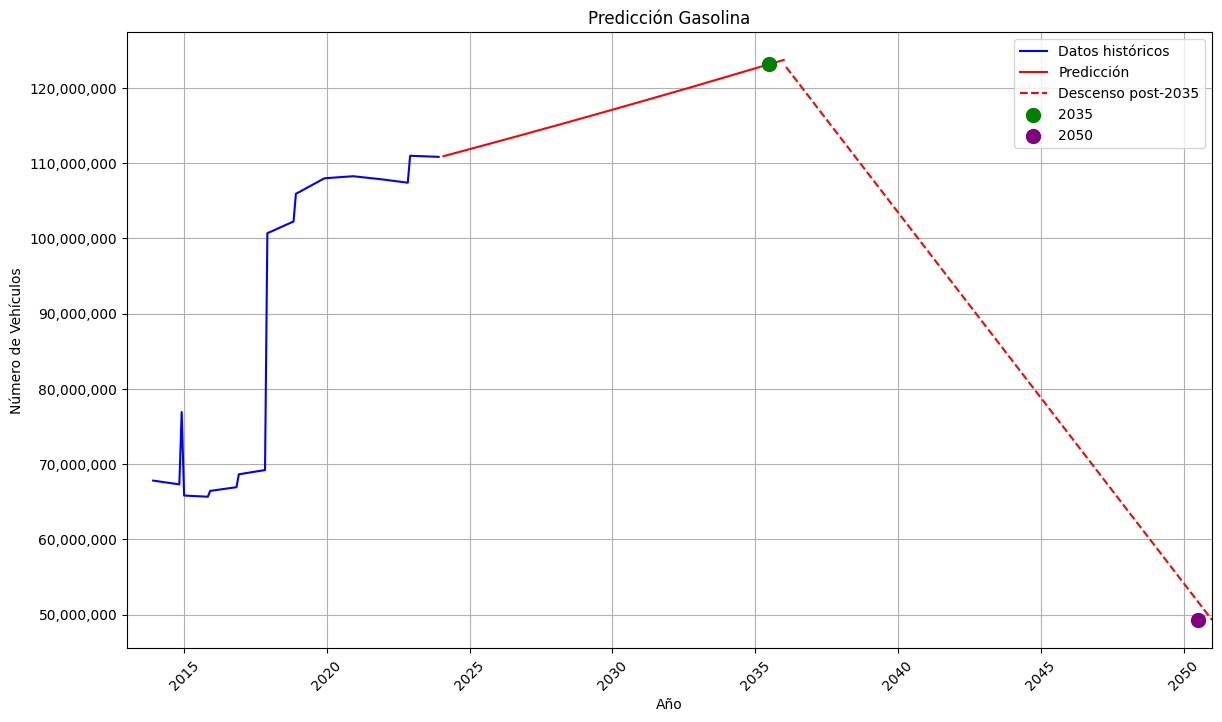

Analizando Hidrógeno


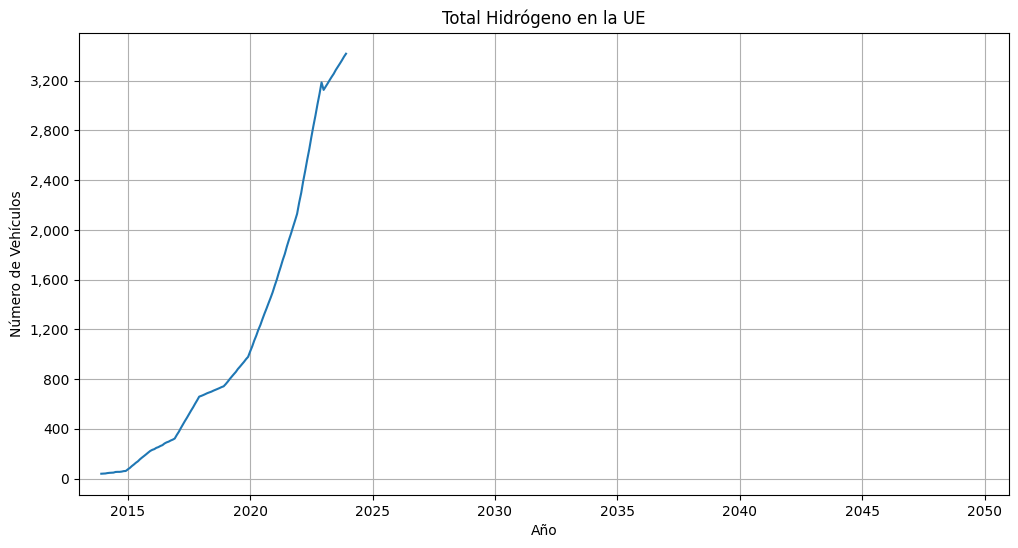

Predicción para 2035: 8,000 vehículos
Predicción para 2050: 14,090 vehículos


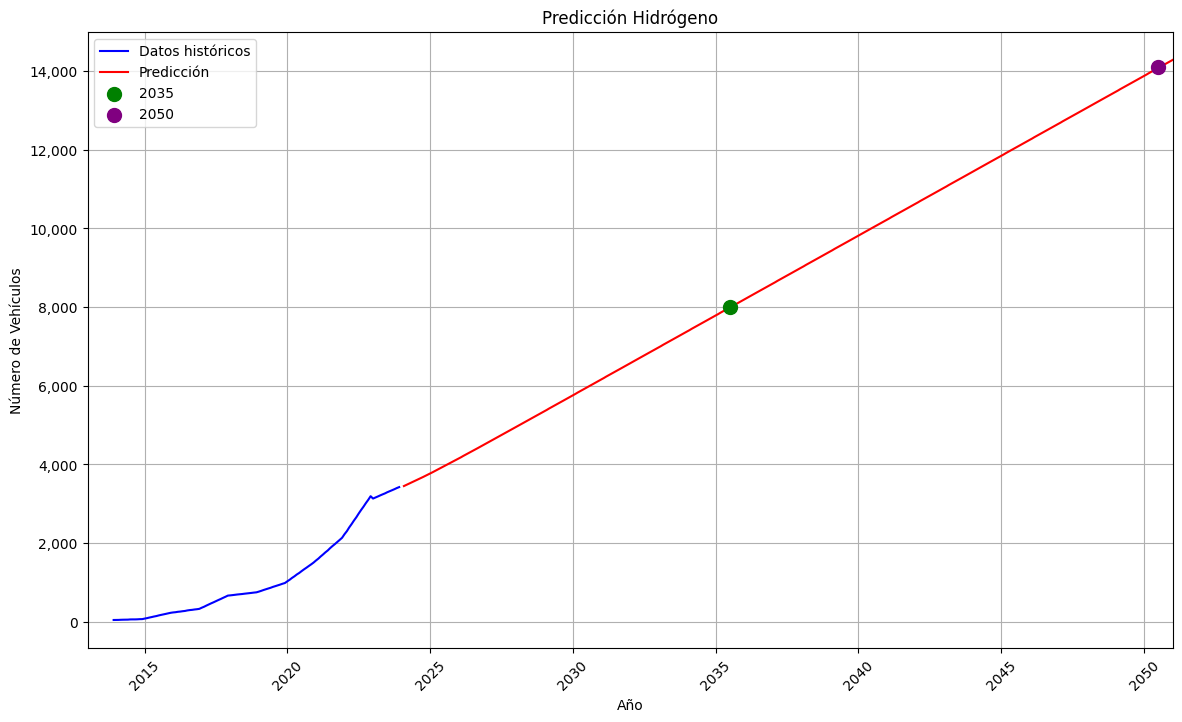

Analizando Gas licuado de petróleo 


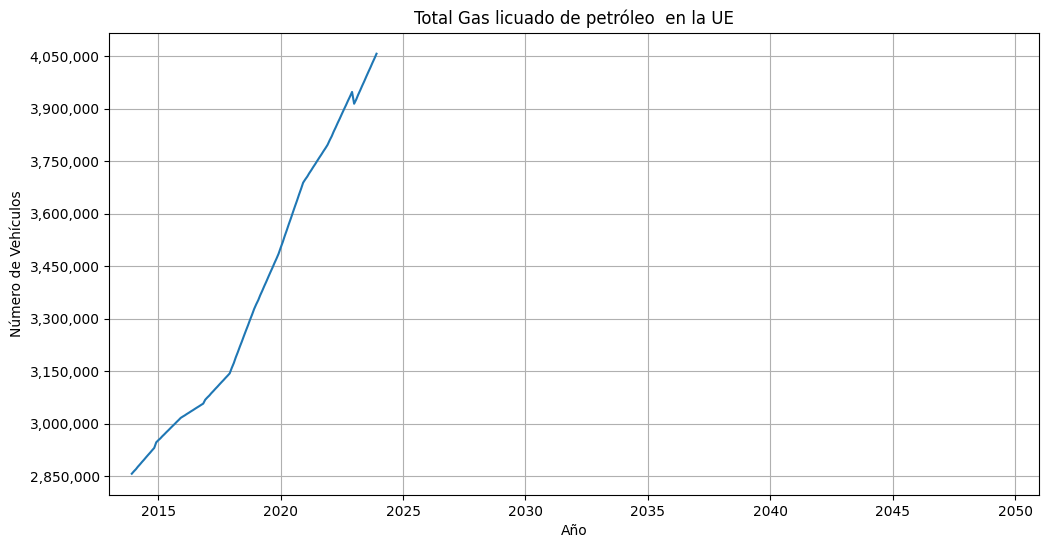

Predicción para 2035: 5,894,051 vehículos
Predicción para 2050: 8,281,385 vehículos


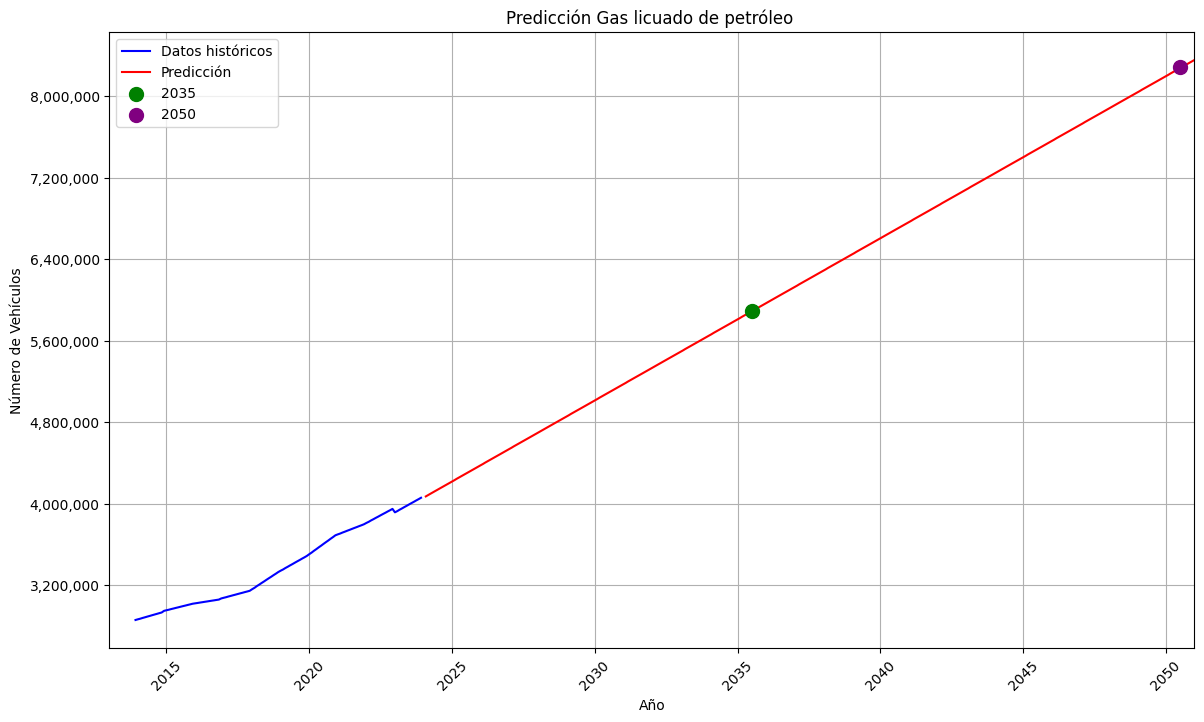

Analizando Híbrido enchufable Gasolina


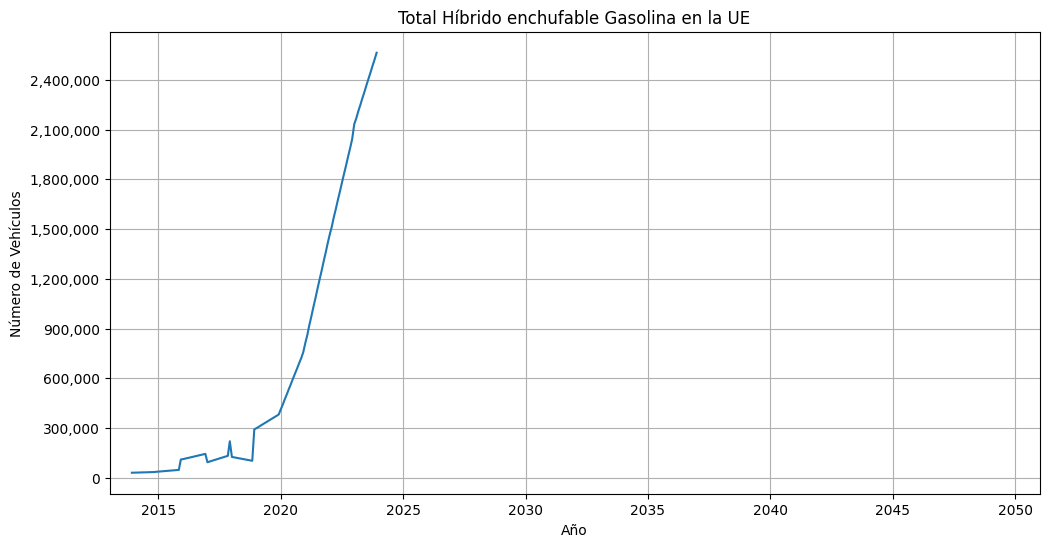

Predicción para 2035: 8,517,435 vehículos
Predicción para 2050: 3,406,974 vehículos


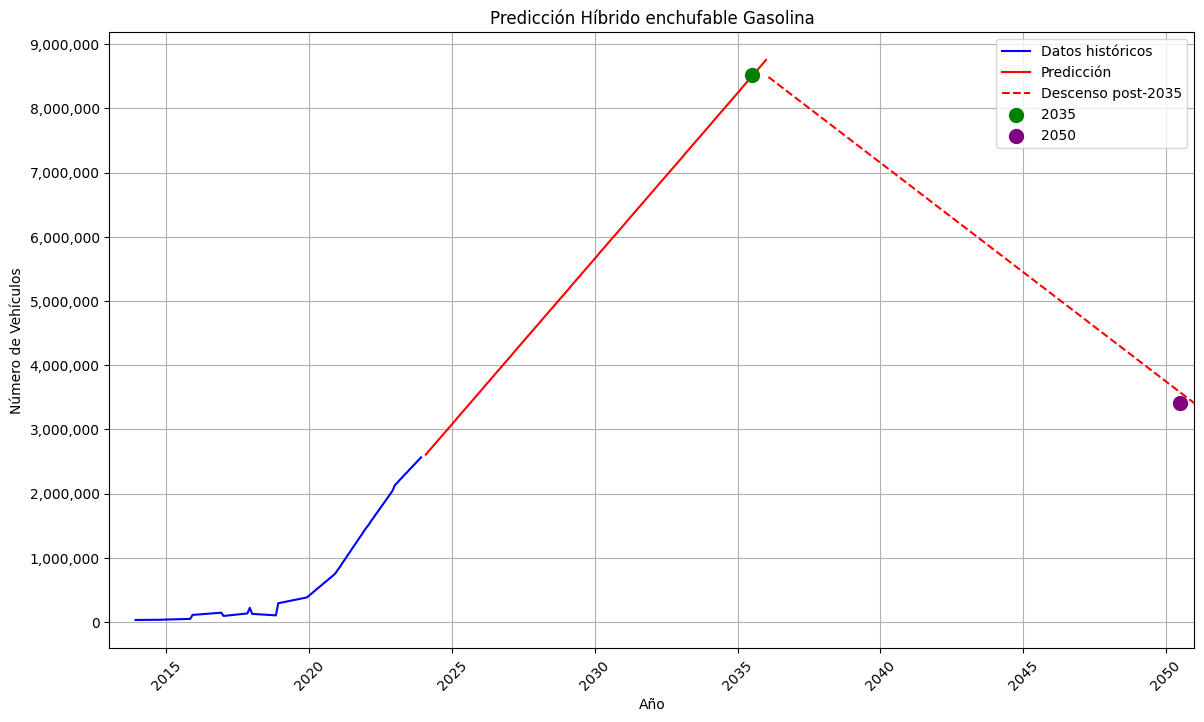


Predicciones para 2035 y 2050:
Año                                  2035          2050
Tipo_Vehiculo                                          
Diésel                       8.695660e+07  3.478264e+07
Eléctrico                    3.488379e+07  1.167913e+08
Gas licuado de petróleo      5.894051e+06  8.281385e+06
Gasolina                     1.231805e+08  4.927221e+07
Hidrógeno                    8.000026e+03  1.408973e+04
Híbrido enchufable Gasolina  8.517435e+06  3.406974e+06


In [ ]:
# 12. Predicción con ARIMA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Cargar dataset interpolado
df = pd.read_excel('totales_UE_mensuales.xlsx')

# Convertir año y mes a fecha
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str).str.zfill(2) + '-01')

# Tipos de vehículos a analizar
tipos_vehiculos = ['Eléctrico', 'Diésel ', 'Gasolina', 'Hidrógeno',
                 'Gas licuado de petróleo ', 'Híbrido enchufable Gasolina']

# Tipos que disminuirán después de 2035 debido a políticas
tipos_descenso = ['Diésel ', 'Gasolina', 'Híbrido enchufable Gasolina']

# Factor de reducción para 2050 (respecto a 2035)
factor_reduccion_2050 = 0.4  # 60% de reducción

# Factores de crecimiento anual basados en datos históricos recientes (últimos 5 años)
factores_crecimiento_anual = {
    'Gasolina': 0.0092,
    'Diésel ': -0.0045
}

# Tipos para usar tendencia histórica en lugar de ARIMA
tipos_tendencia = ['Gasolina', 'Diésel ']

# Órdenes de diferenciación basados en resultados del test de Dickey-Fuller
ordenes_diferenciacion = {
    'Eléctrico': 3,
    'Diésel ': 1,
    'Gasolina': 1,
    'Hidrógeno': 2,
    'Gas licuado de petróleo ': 1,
    'Híbrido enchufable Gasolina': 2
}

# Modelos específicos de ARIMA
modelos_especificos = {
    'Eléctrico': (1, 3, 1),          # ARIMA(1,3,1)
    'Diésel ': (0, 1, 1),            # ARIMA(0,1,1)
    'Gasolina': (1, 1, 0),           # ARIMA(1,1,0) -
    'Hidrógeno': (4, 2, 2),          # ARIMA(4,2,2)
    'Gas licuado de petróleo ': (0, 2, 1),  # ARIMA(0,2,1)
    'Híbrido enchufable Gasolina': (0, 2, 1)  # ARIMA(0,2,1)
}

# Función para realizar predicciones a largo plazo
def predecir_largo_plazo(modelo, serie, años_futuro):
    # Calcular número de meses
    n_meses = años_futuro * 12
    ultimo_periodo = serie.index[-1]

    # Generar fechas futuras
    fechas_futuro = pd.date_range(
        start=ultimo_periodo + pd.DateOffset(months=1),
        periods=n_meses,
        freq='M'
    )

    # Realizar predicciones
    predicciones = modelo.forecast(steps=n_meses)

    # Crear DataFrame con fechas y predicciones
    df_pred = pd.DataFrame({
        'Fecha': fechas_futuro,
        'Predicción': predicciones
    })

    return df_pred

# Función para predecir usando tendencia histórica
def predecir_con_tendencia(serie, tasa_anual, años_futuro):
    # Obtener último valor de la serie
    ultimo_valor = serie.iloc[-1]
    ultimo_periodo = serie.index[-1]

    # Calcular número de meses
    n_meses = años_futuro * 12

    # Generar fechas futuras
    fechas_futuro = pd.date_range(
        start=ultimo_periodo + pd.DateOffset(months=1),
        periods=n_meses,
        freq='M'
    )

    # Calcular predicciones con crecimiento/decrecimiento mensual
    tasa_mensual = (1 + tasa_anual) ** (1/12) - 1  # Convertir tasa anual a mensual
    predicciones = []

    for i in range(n_meses):
        valor_predicho = ultimo_valor * ((1 + tasa_mensual) ** (i + 1))
        predicciones.append(valor_predicho)

    # Crear DataFrame con fechas y predicciones
    df_pred = pd.DataFrame({
        'Fecha': fechas_futuro,
        'Predicción': predicciones
    })

    return df_pred

# Función para formatear números enteros con separadores de miles
def format_int_with_commas(x, pos):
    return f'{int(x):,}'

# DataFrame para guardar todas las predicciones a largo plazo
todas_predicciones = pd.DataFrame(columns=['Tipo_Vehiculo', 'Año', 'Predicción'])

# Definir rango de fechas para visualización
fecha_inicio_visualizacion = pd.to_datetime('2013-01-01')
fecha_fin_visualizacion = pd.to_datetime('2050-12-31')

# Analizar cada tipo de vehículo
for tipo in tipos_vehiculos:
    print(f"Analizando {tipo}")

    # Obtener serie temporal (suma de todos los países)
    serie_total = df.groupby('Fecha')[tipo].sum()

    # Visualizar serie original
    plt.figure(figsize=(12, 6))
    plt.plot(serie_total)
    plt.title(f'Total {tipo} en la UE')
    plt.xlabel('Año')
    plt.ylabel('Número de Vehículos')
    plt.grid(True)

    # Formatear eje Y con números enteros
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_int_with_commas))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Establecer límites del eje X para mostrar hasta 2050
    plt.xlim(fecha_inicio_visualizacion, fecha_fin_visualizacion)
    # Formatear el eje X para mostrar años
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Mostrar cada 5 años
    plt.show()

    try:
        # Decidir si usar ARIMA o tendencia histórica
        if tipo in tipos_tendencia:
            # Usar tendencia histórica
            tasa_anual = factores_crecimiento_anual[tipo]

            # Predicción hasta 2035
            años_hasta_2035 = 2035 - 2023
            pred_2035 = predecir_con_tendencia(serie_total, tasa_anual, años_hasta_2035)
            valor_2035 = pred_2035[pred_2035['Fecha'].dt.year == 2035]['Predicción'].mean()
            valor_2035 = max(0, valor_2035)  # Evitar valores negativos

            # Aplicar política post-2035
            valor_2050 = valor_2035 * factor_reduccion_2050

            print(f"Predicción para 2035: {valor_2035:,.0f} vehículos")
            print(f"Predicción para 2050: {valor_2050:,.0f} vehículos")

        else:
            # Usar ARIMA como antes
            p, d, q = modelos_especificos[tipo]
            modelo = ARIMA(serie_total, order=(p, d, q))
            resultado = modelo.fit()

            # Realizar predicciones para 2035
            años_hasta_2035 = 2035 - 2023
            pred_2035 = predecir_largo_plazo(resultado, serie_total, años_hasta_2035)

            # Extraer valor específico para 2035
            valor_2035 = pred_2035[pred_2035['Fecha'].dt.year == 2035]['Predicción'].mean()
            valor_2035 = max(0, valor_2035)  # Evitar valores negativos

            # Aplicar política post-2035 para tipos específicos
            if tipo in tipos_descenso:
                # Reducción del 60% entre 2035 y 2050
                valor_2050 = valor_2035 * factor_reduccion_2050
                print(f"Predicción para 2035: {valor_2035:,.0f} vehículos")
                print(f"Predicción para 2050: {valor_2050:,.0f} vehículos")
            else:
                # Para otros tipos, seguir con el modelo original
                años_hasta_2050 = 2050 - 2023
                pred_2050 = predecir_largo_plazo(resultado, serie_total, años_hasta_2050)
                valor_2050 = pred_2050[pred_2050['Fecha'].dt.year == 2050]['Predicción'].mean()
                valor_2050 = max(0, valor_2050)  # Evitar valores negativos
                print(f"Predicción para 2035: {valor_2035:,.0f} vehículos")
                print(f"Predicción para 2050: {valor_2050:,.0f} vehículos")

        # Guardar predicciones en el DataFrame
        nueva_fila_2035 = pd.DataFrame({
            'Tipo_Vehiculo': [tipo],
            'Año': [2035],
            'Predicción': [valor_2035]
        })

        nueva_fila_2050 = pd.DataFrame({
            'Tipo_Vehiculo': [tipo],
            'Año': [2050],
            'Predicción': [valor_2050]
        })

        todas_predicciones = pd.concat([todas_predicciones, nueva_fila_2035, nueva_fila_2050], ignore_index=True)

        plt.figure(figsize=(14, 8))

        # Datos históricos
        plt.plot(serie_total.index, serie_total.values, 'b-', label='Datos históricos')

        if tipo in tipos_tendencia:
            # Para tipos con tendencia, graficar hasta 2035
            años_hasta_2035 = 2035 - 2023
            pred_tendencia = predecir_con_tendencia(serie_total, factores_crecimiento_anual[tipo], años_hasta_2035)
            plt.plot(pred_tendencia['Fecha'], pred_tendencia['Predicción'], 'r-', label='Predicción')

            # Entre 2035 y 2050 con descenso lineal
            fecha_inicio_descenso = pd.to_datetime('2035-12-31')
            fecha_fin_descenso = pd.to_datetime('2050-12-31')
            fechas_descenso = pd.date_range(
                start=fecha_inicio_descenso + pd.DateOffset(days=1),
                end=fecha_fin_descenso,
                freq='M'
            )

            valores_descenso = []
            for fecha in fechas_descenso:
                prop = (fecha - fecha_inicio_descenso).days / (fecha_fin_descenso - fecha_inicio_descenso).days
                valor = valor_2035 + prop * (valor_2050 - valor_2035)
                valores_descenso.append(valor)

            # Asegurar que el último valor coincida exactamente con valor_2050
            if valores_descenso:
                valores_descenso[-1] = valor_2050

            plt.plot(fechas_descenso, valores_descenso, 'r--', label='Descenso post-2035')

        elif tipo in tipos_descenso:
            # Para tipos de descenso, crear toda la trayectoria de predicciones
            fechas_pred_hasta_2035 = pred_2035['Fecha']
            valores_pred_hasta_2035 = pred_2035['Predicción']

            # Entre 2035 y 2050 con descenso lineal
            fecha_inicio_descenso = pd.to_datetime('2035-12-31')
            fecha_fin_descenso = pd.to_datetime('2050-12-31')
            fechas_descenso = pd.date_range(
                start=fecha_inicio_descenso + pd.DateOffset(days=1),
                end=fecha_fin_descenso,
                freq='M'
            )

            valores_descenso = []
            for fecha in fechas_descenso:
                prop = (fecha - fecha_inicio_descenso).days / (fecha_fin_descenso - fecha_inicio_descenso).days
                valor = valor_2035 + prop * (valor_2050 - valor_2035)
                valores_descenso.append(valor)

            plt.plot(fechas_pred_hasta_2035, valores_pred_hasta_2035, 'r-', label='Predicción')
            plt.plot(fechas_descenso, valores_descenso, 'r--', label='Descenso post-2035')
        else:
            # Para otros tipos, predicción completa con el modelo ARIMA
            años_hasta_2050 = 2050 - 2023
            pred_completa = predecir_largo_plazo(resultado, serie_total, años_hasta_2050)
            plt.plot(pred_completa['Fecha'], pred_completa['Predicción'], 'r-', label='Predicción')

        # Destacar años específicos
        fecha_2035 = pd.to_datetime('2035-06-30')
        fecha_2050 = pd.to_datetime('2050-06-30')

        plt.scatter(fecha_2035, valor_2035, color='g', s=100, zorder=5, label='2035')
        plt.scatter(fecha_2050, valor_2050, color='purple', s=100, zorder=5, label='2050')

        # Título sin mencionar tendencia histórica
        plt.title(f'Predicción {tipo}')
        plt.xlabel('Año')
        plt.ylabel('Número de Vehículos')
        plt.legend()
        plt.grid(True)

        # CONFIGURACIÓN DEL EJE X PARA VISUALIZAR HASTA 2050
        plt.xlim(fecha_inicio_visualizacion, fecha_fin_visualizacion)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Mostrar cada 5 años
        plt.xticks(rotation=45)

        # FORMATEO DEL EJE Y PARA MOSTRAR NÚMEROS ENTEROS
        plt.gca().yaxis.set_major_formatter(FuncFormatter(format_int_with_commas))
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

        plt.show()

    except Exception as e:
        print(f"Error al realizar predicciones para {tipo}: {e}")

# Guardar todas las predicciones
todas_predicciones.to_excel('predicciones_2035_2050_tendencia_policy.xlsx', index=False)

# Mostrar tabla de resultados
print("\nPredicciones para 2035 y 2050:")
print(todas_predicciones.pivot(index='Tipo_Vehiculo', columns='Año', values='Predicción'))

#3º Parte Análisis de negocio


In [ ]:
#13
# Importamos las bibliotecas necesarias
import pandas as pd

# Cargamos el dataset directamente
df = pd.read_excel('dataset_mensual_interpolado.xlsx')

# Filtrar solo los datos de diciembre para tener valores anuales completos
df_annual = df[df['Mes'] == 12].copy()

# Filtrar solo los años 2013 y 2023 y excluir Grecia
df_filtered = df_annual[(df_annual['Año'].isin([2013, 2023])) & (df_annual['País'] != 'Grecia')].copy()

# 1. ANÁLISIS DE VEHÍCULOS ELÉCTRICOS Y DE HIDRÓGENO POR PAÍS EN 2013

# Filtrar datos de 2013
df_2013 = df_filtered[df_filtered['Año'] == 2013]

# Calcular total de vehículos cero emisiones
df_2013['Total_Cero_Emisiones'] = df_2013['Eléctrico'] + df_2013['Hidrógeno']

# Ordenar por total de vehículos de cero emisiones
df_2013_sorted = df_2013.sort_values(by='Total_Cero_Emisiones', ascending=True)

print("\n=== RANKING DE PAÍSES POR VEHÍCULOS DE CERO EMISIONES EN 2013 ===")
print(df_2013_sorted[['País', 'Eléctrico', 'Hidrógeno', 'Total_Cero_Emisiones']].to_string(index=False))

# Identificar los 3 países con más y menos vehículos cero emisiones en 2013
top_3_2013 = df_2013_sorted.tail(3).iloc[::-1]  # Revertimos para que vaya de mayor a menor
bottom_3_2013 = df_2013_sorted.head(3)

print("\n=== TOP 3 PAÍSES CON MÁS VEHÍCULOS CERO EMISIONES EN 2013 ===")
print(top_3_2013[['País', 'Total_Cero_Emisiones']].to_string(index=False))

print("\n=== 3 PAÍSES CON MENOS VEHÍCULOS CERO EMISIONES EN 2013 ===")
print(bottom_3_2013[['País', 'Total_Cero_Emisiones']].to_string(index=False))

# 2. ANÁLISIS DE VEHÍCULOS ELÉCTRICOS Y DE HIDRÓGENO POR PAÍS EN 2023

# Filtrar datos de 2023
df_2023 = df_filtered[df_filtered['Año'] == 2023]

# Calcular total de vehículos cero emisiones
df_2023['Total_Cero_Emisiones'] = df_2023['Eléctrico'] + df_2023['Hidrógeno']

# Ordenar por total de vehículos de cero emisiones
df_2023_sorted = df_2023.sort_values(by='Total_Cero_Emisiones', ascending=True)

print("\n=== RANKING DE PAÍSES POR VEHÍCULOS DE CERO EMISIONES EN 2023 ===")
print(df_2023_sorted[['País', 'Eléctrico', 'Hidrógeno', 'Total_Cero_Emisiones']].to_string(index=False))

# Identificar los 3 países con más y menos vehículos cero emisiones en 2023
top_3_2023 = df_2023_sorted.tail(3).iloc[::-1]  # Revertimos para que vaya de mayor a menor
bottom_3_2023 = df_2023_sorted.head(3)

print("\n=== TOP 3 PAÍSES CON MÁS VEHÍCULOS CERO EMISIONES EN 2023 ===")
print(top_3_2023[['País', 'Total_Cero_Emisiones']].to_string(index=False))

print("\n=== 3 PAÍSES CON MENOS VEHÍCULOS CERO EMISIONES EN 2023 ===")
print(bottom_3_2023[['País', 'Total_Cero_Emisiones']].to_string(index=False))

# 3. CÁLCULO DEL CRECIMIENTO ENTRE 2013 Y 2023

# Crear DataFrames con solo las columnas necesarias
df_2013_simple = df_2013.set_index('País')[['Eléctrico', 'Hidrógeno', 'Total_Cero_Emisiones']]
df_2023_simple = df_2023.set_index('País')[['Eléctrico', 'Hidrógeno', 'Total_Cero_Emisiones']]

# Calcular el crecimiento porcentual del total
# Nota: Reemplazamos 0 con 1 para evitar divisiones por cero
crecimiento_total = ((df_2023_simple['Total_Cero_Emisiones'] - df_2013_simple['Total_Cero_Emisiones']) /
                    df_2013_simple['Total_Cero_Emisiones'].replace(0, 1)) * 100

# Crear un DataFrame con los resultados
df_crecimiento = pd.DataFrame({
    'Total 2013': df_2013_simple['Total_Cero_Emisiones'],
    'Total 2023': df_2023_simple['Total_Cero_Emisiones'],
    'Crecimiento (%)': crecimiento_total
})

# Ordenar por total de vehículos en 2023
df_crecimiento_sorted = df_crecimiento.sort_values(by='Total 2023', ascending=True)

print("\n=== CRECIMIENTO DE VEHÍCULOS CERO EMISIONES POR PAÍS (2013-2023) ===")
print(df_crecimiento_sorted.to_string())

# 4. ESTADÍSTICAS PARA TODA LA UE

total_cero_emisiones_2013 = df_2013['Total_Cero_Emisiones'].sum()
total_cero_emisiones_2023 = df_2023['Total_Cero_Emisiones'].sum()
crecimiento_total_ue = ((total_cero_emisiones_2023 - total_cero_emisiones_2013) / total_cero_emisiones_2013) * 100

print("\n=== ESTADÍSTICAS PARA TODA LA UE ===")
print(f"Total vehículos cero emisiones 2013: {total_cero_emisiones_2013:,.0f}")
print(f"Total vehículos cero emisiones 2023: {total_cero_emisiones_2023:,.0f}")
print(f"Crecimiento total: {crecimiento_total_ue:.2f}%")

# 5. RESUMEN COMPARATIVO DE LOS TOP 3 PAÍSES

print("\n=== RESUMEN COMPARATIVO ===")
print("Top 3 países con más vehículos cero emisiones en 2013:")
for i, (index, row) in enumerate(top_3_2013.iterrows(), 1):
    print(f"{i}. {row['País']}: {row['Total_Cero_Emisiones']:,.0f} vehículos")

print("\nTop 3 países con más vehículos cero emisiones en 2023:")
for i, (index, row) in enumerate(top_3_2023.iterrows(), 1):
    print(f"{i}. {row['País']}: {row['Total_Cero_Emisiones']:,.0f} vehículos")

print("\n3 países con menos vehículos cero emisiones en 2013:")
for i, (index, row) in enumerate(bottom_3_2013.iterrows(), 1):
    print(f"{i}. {row['País']}: {row['Total_Cero_Emisiones']:,.0f} vehículos")

print("\n3 países con menos vehículos cero emisiones en 2023:")
for i, (index, row) in enumerate(bottom_3_2023.iterrows(), 1):
    print(f"{i}. {row['País']}: {row['Total_Cero_Emisiones']:,.0f} vehículos")


=== RANKING DE PAÍSES POR VEHÍCULOS DE CERO EMISIONES EN 2013 ===
           País  Eléctrico  Hidrógeno  Total_Cero_Emisiones
        Croacia        0.0        0.0                   0.0
       Lituania        2.0        0.0                   2.0
         Chipre        6.0        0.0                   6.0
        Letonia       15.0        0.0                  15.0
      Eslovenia       29.0        0.0                  29.0
     Eslovaquia       50.0        0.0                  50.0
          Malta       59.0        0.0                  59.0
        Polonia       81.0        0.0                  81.0
       Bulgaria       91.0        0.0                  91.0
        Hungría      110.0        0.0                 110.0
      Finlandia      188.0        1.0                 189.0
República Checa      237.0        0.0                 237.0
     Luxemburgo      263.0        0.0                 263.0
        Irlanda      280.0        0.0                 280.0
       Portugal      456.0       

In [ ]:
#14
# Importamos las bibliotecas necesarias
import pandas as pd

# Cargamos el dataset
df = pd.read_excel('dataset_mensual_interpolado.xlsx')

# Filtrar solo los datos de diciembre 2023 para tener valores anuales completos
df_2023 = df[(df['Año'] == 2023) & (df['Mes'] == 12)].copy()

# Crear columna de vehículos cero emisiones (suma de eléctricos e hidrógeno)
df_2023['Cero_Emisiones'] = df_2023['Eléctrico'] + df_2023['Hidrógeno']

# Calcular total de vehículos por país
columnas_vehiculos = [
    'Gasolina', 'Híbrido no enchufable Gasolina', 'Híbrido enchufable Gasolina',
    'Diésel ', 'Híbrido no enchufable Diésel', 'Híbrido enchufable Diésel',
    'Gas licuado de petróleo ', 'Eléctrico', 'Hidrógeno'
]

# Calcular el total de vehículos sumando todas las columnas de tipos de vehículos
df_2023['Total_Vehiculos'] = df_2023[columnas_vehiculos].sum(axis=1)

# Calcular el porcentaje de vehículos cero emisiones
df_2023['Porcentaje_Cero_Emisiones'] = (df_2023['Cero_Emisiones'] / df_2023['Total_Vehiculos']) * 100

# Seleccionar las columnas relevantes y ordenar por porcentaje descendente
resultado = df_2023[['País', 'Total_Vehiculos', 'Cero_Emisiones', 'Porcentaje_Cero_Emisiones']]
resultado_ordenado = resultado.sort_values(by='Porcentaje_Cero_Emisiones', ascending=False)

# Mostrar resultados
print("\n=== PORCENTAJE DE VEHÍCULOS CERO EMISIONES POR PAÍS (2023) ===")
for index, row in resultado_ordenado.iterrows():
    print(f"{row['País']}:")
    print(f"  Vehículos totales: {row['Total_Vehiculos']:,.0f}")
    print(f"  Vehículos cero emisiones (hidrógeno + eléctrico): {row['Cero_Emisiones']:,.0f}")
    print(f"  Porcentaje cero emisiones: {row['Porcentaje_Cero_Emisiones']:.2f}%\n")

resultado_ordenado.to_excel('vehiculos_cero_emisiones_ue_2023.xlsx')


=== PORCENTAJE DE VEHÍCULOS CERO EMISIONES POR PAÍS (2023) ===
Dinamarca:
  Vehículos totales: 2,827,771
  Vehículos cero emisiones (hidrógeno + eléctrico): 200,152
  Porcentaje cero emisiones: 7.08%

Suecia:
  Vehículos totales: 4,767,132
  Vehículos cero emisiones (hidrógeno + eléctrico): 291,716
  Porcentaje cero emisiones: 6.12%

Luxemburgo:
  Vehículos totales: 453,129
  Vehículos cero emisiones (hidrógeno + eléctrico): 23,271
  Porcentaje cero emisiones: 5.14%

Países Bajos:
  Vehículos totales: 9,056,066
  Vehículos cero emisiones (hidrógeno + eléctrico): 444,697
  Porcentaje cero emisiones: 4.91%

Bélgica:
  Vehículos totales: 5,990,898
  Vehículos cero emisiones (hidrógeno + eléctrico): 181,476
  Porcentaje cero emisiones: 3.03%

Austria:
  Vehículos totales: 5,179,893
  Vehículos cero emisiones (hidrógeno + eléctrico): 155,557
  Porcentaje cero emisiones: 3.00%

Alemania:
  Vehículos totales: 49,012,870
  Vehículos cero emisiones (hidrógeno + eléctrico): 1,410,887
  Porcenta